# INITIAL IMPORTS

In [ ]:
#prod
#Imports and Installs, uncomment the install for first run
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# LOADING DATA

In [ ]:
#prod
#Data stored in Google Drive, must authenticate to pull data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#prod
#01_M02_DC_train
#https://drive.google.com/file/d/1DO8bKxsTZe8gQ_zNnf6X1-9xlsWw37y2/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1DO8bKxsTZe8gQ_zNnf6X1-9xlsWw37y2'})
fileDownloaded.GetContentFile('01_M02_DC_train.csv')

#01_M02_train_fault_data
#https://drive.google.com/file/d/1dppx60e2tdu4nm2XvZ1lRlMVPnVI4cvV/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1dppx60e2tdu4nm2XvZ1lRlMVPnVI4cvV'})
fileDownloaded.GetContentFile('01_M02_train_fault_data.csv')

#01_M02_DC_train_ttf
#https://drive.google.com/file/d/1xBhlyjDhO1t_jXJLsKxP-SXD0XhKtmAU/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1xBhlyjDhO1t_jXJLsKxP-SXD0XhKtmAU'})
fileDownloaded.GetContentFile('01_M02_DC_train_ttf.csv')

#loading into CSVs
df_train = pd.read_csv('01_M02_DC_train.csv', delimiter=',')
df_train.set_index('time')

df_fault = pd.read_csv('01_M02_train_fault_data.csv', delimiter=',')
df_fault.set_index('time')

df_ttf = pd.read_csv('01_M02_DC_train_ttf.csv', delimiter=',')
df_ttf.set_index('time')


# #03_M02_DC_train
# #https://drive.google.com/file/d/1Mho3WwCHX5JUo5IZwibV5MNBvJr_ZRhJ/view?usp=share_link
# fileDownloaded = drive.CreateFile({'id':'1Mho3WwCHX5JUo5IZwibV5MNBvJr_ZRhJ'})
# fileDownloaded.GetContentFile('03_M02_DC_train.csv')

# #03_M02_train_fault_data
# #https://drive.google.com/file/d/1-uZaGxkZBF-wrg5mBIL1WIL187Bc_cUt/view?usp=sharing
# fileDownloaded = drive.CreateFile({'id':'1-uZaGxkZBF-wrg5mBIL1WIL187Bc_cUt'})
# fileDownloaded.GetContentFile('03_M02_train_fault_data.csv')

# #03_M02_DC_train_ttf
# #https://drive.google.com/file/d/1IpBcjBap0LCVqKLb2Uwk3biTuXlpB4qF/view?usp=sharing
# fileDownloaded = drive.CreateFile({'id':'1IpBcjBap0LCVqKLb2Uwk3biTuXlpB4qF'})
# fileDownloaded.GetContentFile('03_M02_DC_train_ttf.csv')

# #loading into CSVs
# df_train = pd.read_csv('03_M02_DC_train.csv', delimiter=',')
# df_train.set_index('time')

# df_fault = pd.read_csv('03_M02_train_fault_data.csv', delimiter=',')
# df_fault.set_index('time')

# df_ttf = pd.read_csv('03_M02_DC_train_ttf.csv', delimiter=',')
# df_ttf.set_index('time')

,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
time,,,
3283834,623234.0,9146470.0,632514.0
3283838,623230.0,9146466.0,632510.0
3283842,623226.0,9146462.0,632506.0
3283846,623222.0,9146458.0,632502.0
3283850,623218.0,9146454.0,632498.0
...,...,...,...
39789824,NaN,NaN,NaN
39789828,NaN,NaN,NaN
39789832,NaN,NaN,NaN


In [ ]:
#test
df_test = pd.DataFrame(columns=['Col1'])
df_test['Col1'] = df_train['time'].diff()
df_test.loc[df_test['Col1'] != 4]

df_test = df_test.sort_values(by='Col1', ascending=False)

df_test.head()

,Col1
2647487,358128.0
3943980,304828.0
3379652,216624.0
2647793,163528.0
2823462,156502.0


In [ ]:
#prod
#Make sure the TTFs are all divisible by 4, and subtract mod 4 if not
df_ttf['TTF_FlowCool Pressure Dropped Below Limit'] = df_ttf['TTF_FlowCool Pressure Dropped Below Limit'].sub(df_ttf['TTF_FlowCool Pressure Dropped Below Limit'] % 4)
df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'] = df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'].sub(df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'] % 4)
df_ttf['TTF_Flowcool leak'] = df_ttf['TTF_Flowcool leak'].sub(df_ttf['TTF_Flowcool leak'] % 4)

#set failure time to mod 4 as well so the time index matches other datasets
df_fault['time'] = df_fault['time'].sub(df_fault['time'] % 4)

# #sanity check
# print(df_ttf.loc[df_ttf['TTF_FlowCool Pressure Dropped Below Limit'].isin([1, 2, 3])])
# print(df_ttf.loc[df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'].isin([1, 2, 3])])
# print(df_ttf.loc[df_ttf['TTF_Flowcool leak'].isin([1, 2, 3])])

#join the ttf and training data together on time
df = pd.concat([df_train, df_ttf], axis=1, join = 'inner')
df.columns = ['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step','IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT','ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK','FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE','FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION', 'time_drop','TTF_FlowCool Pressure Dropped Below Limit','TTF_Flowcool Pressure Too High Check Flowcool Pump','TTF_Flowcool leak']
#drop excess "time" column by position
df = df.drop(df.columns[24],axis = 1)

#FSP of 1 is the only important data
df = df.loc[df['FIXTURESHUTTERPOSITION'] == 1]
#drop NaNs that are present at the end of ttf (no more failures)
df = df.dropna(subset=['TTF_FlowCool Pressure Dropped Below Limit','TTF_Flowcool Pressure Too High Check Flowcool Pump', 'TTF_Flowcool leak'], how='all')
#drop duplicates ignoring the time and TTF columns
df.drop_duplicates(subset=df.columns.difference(['time', 'TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool Pressure Too High Check Flowcool Pump',	'TTF_Flowcool leak']))

#Make 3 dataframes, one for each fail type
df_f1 = df.drop(['TTF_Flowcool Pressure Too High Check Flowcool Pump', 'TTF_Flowcool leak', "time", "Tool", "ROTATIONSPEED", "FIXTURESHUTTERPOSITION"],axis = 1)
df_f1 = df_f1.dropna()
df_f2 = df.drop(['TTF_FlowCool Pressure Dropped Below Limit',          'TTF_Flowcool leak', "time", "Tool", "ROTATIONSPEED", "FIXTURESHUTTERPOSITION"],axis = 1)
df_f2 = df_f2.dropna()
df_f3 = df.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool Pressure Too High Check Flowcool Pump', "time", "Tool", "ROTATIONSPEED", "FIXTURESHUTTERPOSITION"],axis = 1)
df_f3 = df_f3.dropna()

#stage, recipe, and recipe step are categorical and need to be encoded as such, but adds complexity. Wu dropped them. include OHE in Proprocess_data function

In [ ]:
#prod
def PreProcess_Data(df_f1, df_f2, df_f3, numKept, numFail):
    #only keep the data within 6000 seconds of a failure  to closer analyze the data
    df_f1 = df_f1.loc[df['TTF_FlowCool Pressure Dropped Below Limit'] < numKept]
    df_f2 = df_f2.loc[df['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numKept]
    df_f3 = df_f3.loc[df['TTF_Flowcool leak'] < numKept]

    # df_f1['IsFailure'] = np.where(df_f1['TTF_FlowCool Pressure Dropped Below Limit'] < numFail, True, False)
    # df_f2['IsFailure'] = np.where(df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numFail, True, False)
    # df_f3['IsFailure'] = np.where(df_f3['TTF_Flowcool leak'] < numFail, True, False)
    df_f1.loc[df_f1['TTF_FlowCool Pressure Dropped Below Limit'] < numFail, 'IsFailure'] = 1
    df_f1.loc[df_f1['TTF_FlowCool Pressure Dropped Below Limit'] >= numFail, 'IsFailure'] = 0

    df_f2.loc[df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numFail, 'IsFailure'] = 0
    df_f2.loc[df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] > numFail, 'IsFailure'] = 1

    df_f3.loc[df_f3['TTF_Flowcool leak'] < numFail, 'IsFailure'] = 0
    df_f3.loc[df_f3['TTF_Flowcool leak'] > numFail, 'IsFailure'] = 1

    return df_f1, df_f2, df_f3

# CLASSIFICATION AND REGRESSION FAILURE 1

In [ ]:
#prod
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

!pip install rfpimp
import rfpimp
from sklearn.ensemble import RandomForestRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=746a6120d337c4394074f6e8b3d89fd073388aff59005bcdf9b6f7adbb48ece4
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


RANDOM FOREST RESULTS: 

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       991
         1.0       0.50      1.00      0.66        63

    accuracy                           0.94      1054
   macro avg       0.75      0.97      0.81      1054
weighted avg       0.97      0.94      0.95      1054

2999571    4084.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5051593926757214
--------------------------------------------------------
2999572    4080.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5007971584047505
--------------------------------------------------------
2999573    4076.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5052283581929627
--------------------------------------------------------
2999574    4072.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5051593926757214
--------------------------------------------------------
2999575    4068.

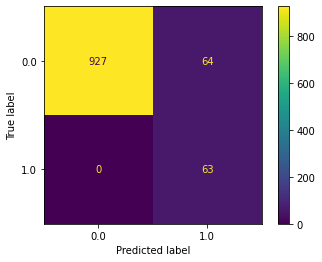

In [ ]:
#prod
#imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.preprocessing import StandardScaler

#get data with 5000 points from 0 as relevant and 250 point from 0 being fail data
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 5000, 250)

#drop categorical columns
df_temp = df1[['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure']]
df1 = df1.drop(['stage', 'recipe', 'recipe_step', 'Lot', 'runnum', 'TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)

#implement a standard scaler to normalize the dataset, but not scaling the target values.
scaler = StandardScaler()
scaler.fit(df1)
df1_scaled = scaler.transform(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns)
#reintroduce the target values
df_index = pd.DataFrame(df_temp.index.values)
df1_scaled = pd.concat([df1_scaled, df_index], axis=1, join = 'inner')
df1_scaled = df1_scaled.set_index(0)
df1_scaled = pd.concat([df1_scaled, df_temp ], axis=1, join = 'inner')

#get indices of 0 from df1
zero_index = df1_scaled.index[df1_scaled['TTF_FlowCool Pressure Dropped Below Limit'] == 0].tolist()
#get data from the second to last 0, until the last 0. This will be the test data
df_stream = df1_scaled.loc[zero_index[-3] : zero_index[-2]]

#train data is all data until the second to last 0
df_stream_train = df1_scaled.loc[:zero_index[-3]]

df_stream_xTrain = df_stream_train.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
df_stream_yTrain = df_stream_train['IsFailure']
#Use SMOTE to oversample the minority class
oversample = SMOTE()
df_stream_xTrain_smote, df_stream_yTrain_smote = oversample.fit_resample(df_stream_xTrain, df_stream_yTrain)

#test data is from the last uninterupted count to 0 in the dataset
df_stream_test = df_stream.loc[df_stream[df_stream['TTF_FlowCool Pressure Dropped Below Limit'] > df_stream['TTF_FlowCool Pressure Dropped Below Limit'].shift().rolling(2, min_periods=1).min()].tail(1).index.item():]

df_stream_xTest = df_stream_test.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
df_stream_yTest = df_stream_test['IsFailure']

#first, classify and see results
RFC = RandomForestClassifier(n_estimators=100, n_jobs = -1, criterion = 'entropy', max_depth = 5, random_state = 25)
#RFC.fit(df_stream_xTrain, df_stream_yTrain)
RFC.fit(df_stream_xTrain_smote, df_stream_yTrain_smote)


print("RANDOM FOREST RESULTS: \n")        
y_pred_stream = RFC.predict(df_stream_xTest)
#print(confusion_matrix(df_stream_yTest, y_pred_stream))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(df_stream_yTest, y_pred_stream),
                               display_labels=RFC.classes_)
disp.plot()
print(classification_report(df_stream_yTest, y_pred_stream))

# for i in range(len(df_stream_xTest)):
#     predictions = RFC.predict_proba(df_stream_xTest.iloc[[i]])
#     if predictions[0][1] > 0.55:
#         print(df_stream_test['TTF_FlowCool Pressure Dropped Below Limit'].iloc[[i]])
#         print(predictions[0][1])
#         print('--------------------------------------------------------')

#OHE, do SMOTE ran split, second to last 0 split, compare those classifiactions, then regress, then predict (maybe with regressor)

In [ ]:
# import pickle
# filename = 'Data_606_RFC.sav'
# pickle.dump(RFC, open(filename, 'wb'))

In [ ]:
#next, regression
RFR = RandomForestRegressor(n_estimators=100, n_jobs=-1)
RFR.fit(df_stream_xTrain, df_stream_train['TTF_FlowCool Pressure Dropped Below Limit'])
y_prediction = RFR.predict(df_stream_xTest)

score=r2_score(df_stream_test['TTF_FlowCool Pressure Dropped Below Limit'],y_prediction)
print('r2 score is:',score)
print('mean_sqrd_error is:',mean_squared_error(df_stream_yTest,y_prediction))
print('root_mean_squared error of is:',np.sqrt(mean_squared_error(df_stream_yTest,y_prediction)))

r2 score is: -1.1986863869170508
mean_sqrd_error is: 2589318.965132448
root_mean_squared error of is: 1609.1360927940334


In [ ]:
for i in range(len(df_stream_xTest)):
    predictions = RFC.predict_proba(df_stream_xTest.iloc[[i]])
    if predictions[0][1] > 0.55:
        print("The regressor estimated a TTF of:" + str(RFR.predict(df_stream_xTest.iloc[[i]])[0]))
        print(df_stream_test.iloc[[i]])
        print(predictions[0][1])
        print('--------------------------------------------------------')

1553.52
             Lot    runnum  IONGAUGEPRESSURE  ETCHBEAMVOLTAGE  \
3000472 -0.14556  0.295618         -0.032993         0.974211   

         ETCHBEAMCURRENT  ETCHSUPPRESSORVOLTAGE  ETCHSUPPRESSORCURRENT  \
3000472         0.495865               0.890604               0.095097   

         FLOWCOOLFLOWRATE  FLOWCOOLPRESSURE  ETCHGASCHANNEL1READBACK  \
3000472          0.902661          0.068823                -0.606006   

         ETCHPBNGASREADBACK  FIXTURETILTANGLE  ACTUALROTATIONANGLE  \
3000472           -0.596428          0.260321            -0.451982   

         ETCHSOURCEUSAGE  ETCHAUXSOURCETIMER  ETCHAUX2SOURCETIMER  \
3000472        -0.569799           -0.533308            -0.533308   

         ACTUALSTEPDURATION  TTF_FlowCool Pressure Dropped Below Limit  \
3000472            1.189286                                      480.0   

         IsFailure  
3000472        0.0  
0.5784333117920063
--------------------------------------------------------
1551.16
            

Mean f1: 1.000
Mean recall: 1.000
Mean precision: 1.000
Mean roc_auc: 1.000
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      1985
         1.0       0.00      0.00      0.00       141

    accuracy                           0.93      2126
   macro avg       0.47      0.50      0.48      2126
weighted avg       0.87      0.93      0.90      2126



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


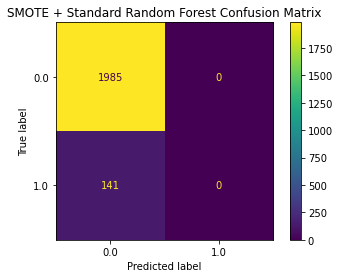

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix

#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scoring = ('f1', 'recall', 'precision', 'roc_auc')
# #Evaluate SMOTE SRF model
# scores = cross_validate(SMOTE_SRF, df_stream_xTrain_smote, df_stream_yTrain_smote, scoring=scoring, cv=cv)
# #Get average evaluation metrics
# print('Mean f1: %.3f' % mean(scores['test_f1']))
# print('Mean recall: %.3f' % mean(scores['test_recall']))
# print('Mean precision: %.3f' % mean(scores['test_precision']))
# print('Mean roc_auc: %.3f' % mean(scores['test_roc_auc']))

#Train SMOTE SRF
SMOTE_SRF.fit(df_stream_xTrain_smote, df_stream_yTrain_smote)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(df_stream_xTest)
#Create confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(df_stream_yTest, y_pred_stream),
                               display_labels=RFC.classes_)
disp.plot()
print(classification_report(df_stream_yTest, y_pred_stream))
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [ ]:
# #get data with 20000 points from 0 as relevant and 600 point from 0 being fail data
# df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 20000, 625)

# #drop categorical columns
# #df1 = df1.drop(['stage', 'recipe', 'recipe_step'], axis=1)
# #get indices of 0 from df1
# zero_index = df1.index[df1['TTF_FlowCool Pressure Dropped Below Limit'] == 0].tolist()
# #get data from the second to last 0, until the last 0. This will be the test data
# df_stream = df1.loc[zero_index[-2] : zero_index[-1]]

# #train data is all data until the second to last 0
# df_stream_train = df1.loc[:zero_index[-2]]

# df_stream_xTrain = df_stream_train.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
# df_stream_yTrain = df_stream_train['IsFailure']

# #test data is from the last uninterupted count to 0 in the dataset
# df_stream_test = df_stream.loc[df_stream[df_stream['TTF_FlowCool Pressure Dropped Below Limit'] > df_stream['TTF_FlowCool Pressure Dropped Below Limit'].shift().rolling(2, min_periods=1).min()].tail(1).index.item():]

# df_stream_xTest = df_stream_test.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
# df_stream_yTest = df_stream_test['IsFailure']

# !pip install pyts
# from pyts.classification import TimeSeriesForest
# clf = TimeSeriesForest(n_windows = 10)
# clf.fit(df_stream_xTrain_smote, df_stream_yTrain_smote)
# clf.score(df_stream_xTest, df_stream_yTest)

print("RANDOM FOREST RESULTS: \n")        
y_pred_tsf = clf.predict(df_stream_xTest)
print(confusion_matrix(df_stream_yTest, y_pred_tsf))
print(classification_report(df_stream_yTest, y_pred_tsf))

RANDOM FOREST RESULTS: 

[[1985    0]
 [ 141    0]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      1985
         1.0       0.00      0.00      0.00       141

    accuracy                           0.93      2126
   macro avg       0.47      0.50      0.48      2126
weighted avg       0.87      0.93      0.90      2126



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df1['recipe_step'].value_counts()
#stage, recipe, and recipe_step

3     27673
39     9452
43     6961
27     5494
31     5101
      ...  
52       15
10       15
13       15
17       15
56       15
Name: recipe_step, Length: 62, dtype: int64

r2 score is: 0.9997270816872363
mean_sqrd_error is: 2499.8917900111433
root_mean_squared error of is: 49.99891788840178


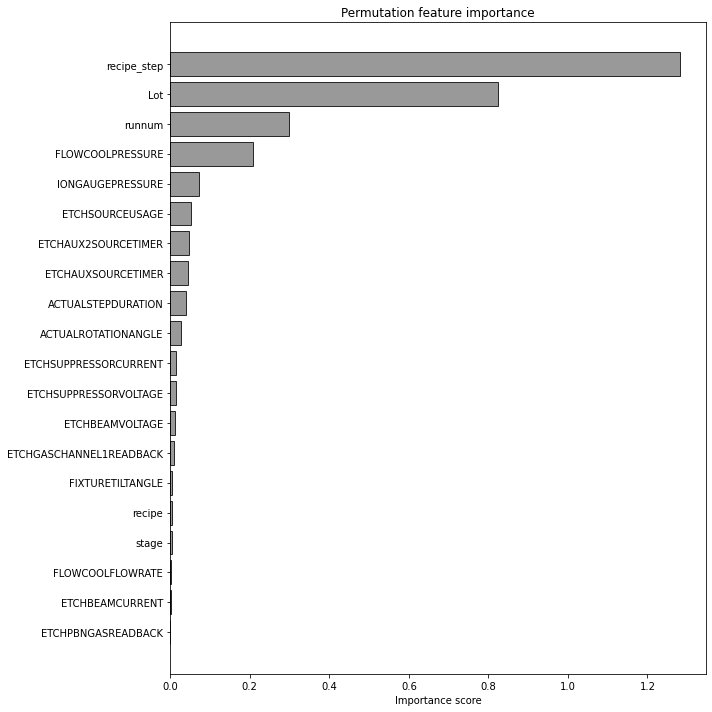

In [ ]:
#example code from https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 10000, 500)
df1 = df1.drop('IsFailure', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df1.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1), df1['TTF_FlowCool Pressure Dropped Below Limit'], test_size = 0.20)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
y_prediction =  rf.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
score=r2_score(y_test,y_prediction)
print('r2 score is:',score)
print('mean_sqrd_error is:',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test,y_prediction)))

############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k') #find how to only see top 10 bars
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
# ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()
fig.set_size_inches(10, 10)

fig.tight_layout()

# Classification Testing

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df1.drop(['IsFailure', 'TTF_FlowCool Pressure Dropped Below Limit'], axis=1), df1['IsFailure'], test_size = 0.20)

# #train model on 80% split
# RFC.fit(X_train, y_train)

# #predict 20% based on model
# y_pred = RFC.predict(X_test)

# print("RANDOM FOREST RESULTS: \n")        

# #prediction results
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
#                                display_labels=RFC.classes_)
# disp.plot()
# print(classification_report(y_test, y_pred))



# #Time Series Cross Validation example (no better)
# cv = TimeSeriesSplit(n_splits=5)
# scoring = ('f1', 'recall', 'precision', 'roc_auc')
# #Evaluate SMOTE SRF model
# #scores = cross_validate(RFC, df1.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1), df1['IsFailure'], scoring=scoring, cv=cv)
# scores = cross_validate(RFC, df_stream_xTrain_smote, df_stream_yTrain_smote, scoring=scoring, cv=cv)
# #Get average evaluation metrics
# print('Mean f1: %.3f' % mean(scores['test_f1']))
# print('Mean recall: %.3f' % mean(scores['test_recall']))
# print('Mean precision: %.3f' % mean(scores['test_precision']))
# print('Mean roc_auc: %.3f' % mean(scores['test_roc_auc']))

In [ ]:
#Logistic Regression
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 6000, 500)
df1 = df1.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1)
#80/20 split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('IsFailure', axis=1), df1['IsFailure'], test_size = 0.20)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5709    0]
 [ 760    0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      5709
         1.0       0.00      0.00      0.00       760

    accuracy                           0.88      6469
   macro avg       0.44      0.50      0.47      6469
weighted avg       0.78      0.88      0.83      6469



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVM (BROKEN)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5692    0]
 [ 777    0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      5692
         1.0       0.00      0.00      0.00       777

    accuracy                           0.88      6469
   macro avg       0.44      0.50      0.47      6469
weighted avg       0.77      0.88      0.82      6469



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(df_f1.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1), df_f1['TTF_FlowCool Pressure Dropped Below Limit'], test_size = 0.20)
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is:',score)
print('mean_sqrd_error is:',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is: 0.28438617389505105
mean_sqrd_error is: 3513009727543.78
root_mean_squared error of is: 1874302.4642633803


In [ ]:
#Linear Regression with cutoff
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 20000, 500)
X_train, X_test, y_train, y_test = train_test_split(df1.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1), df1['TTF_FlowCool Pressure Dropped Below Limit'], test_size = 0.20)
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is:',score)
print('mean_sqrd_error is:',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test,y_prediction)))

DECISION TREE RESULTS: 

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      5686
         1.0       0.99      0.17      0.29       783

    accuracy                           0.90      6469
   macro avg       0.94      0.58      0.62      6469
weighted avg       0.91      0.90      0.87      6469



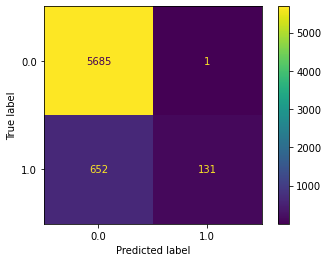

In [ ]:
#Decision Tree
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 6000, 500)
df1 = df1.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1)
#80/20 split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('IsFailure', axis=1), df1['IsFailure'], test_size = 0.20)

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
#train model on 80% split
dt.fit(X_train, y_train)

#predict 20% based on model
y_pred = dt.predict(X_test)

print("DECISION TREE RESULTS: \n")        

#prediction results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=dt.classes_)
disp.plot()
print(classification_report(y_test, y_pred))

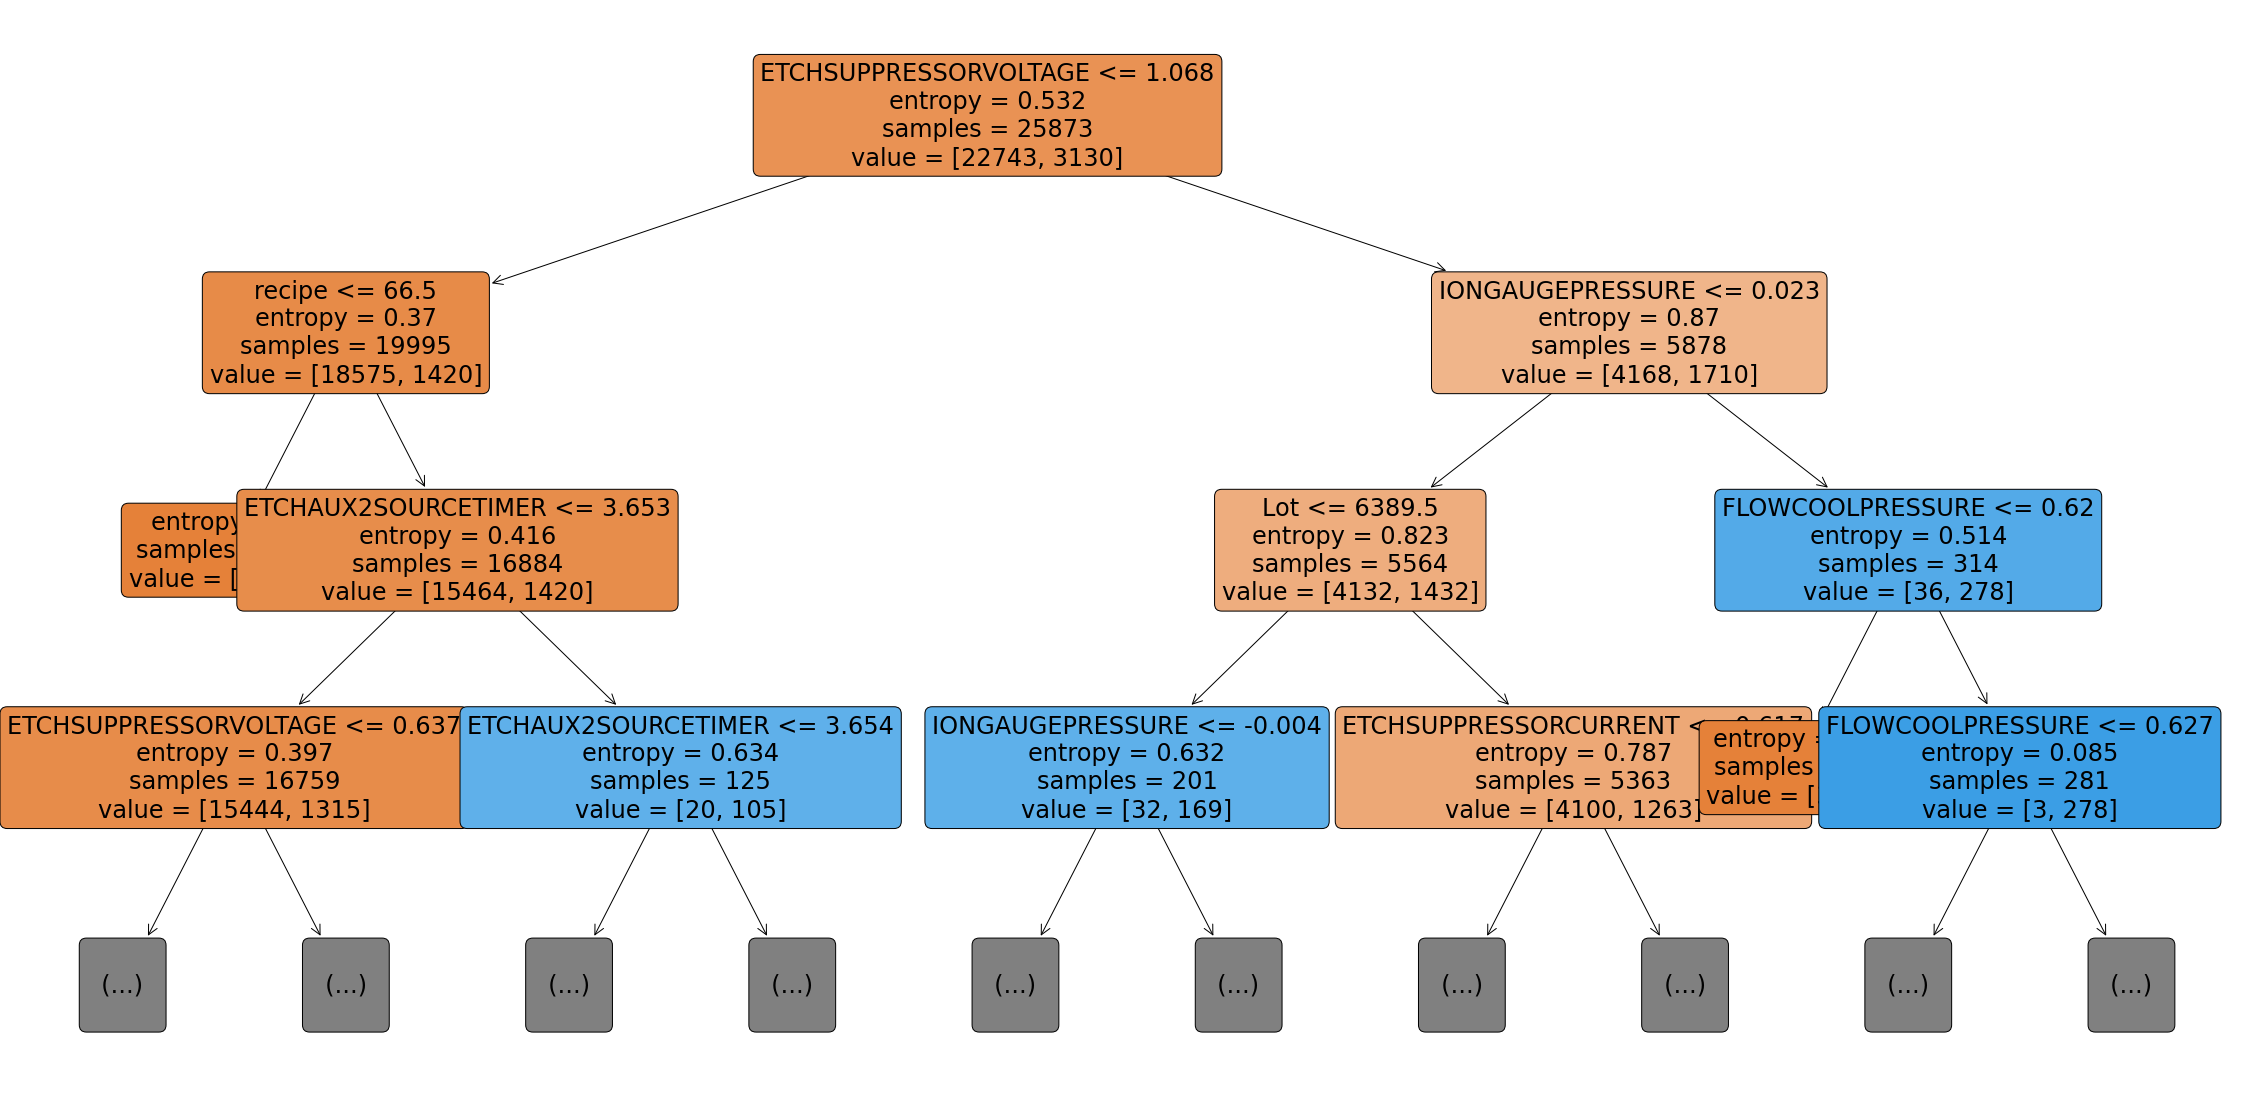

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(dt, feature_names = df1.columns, 
             filled=True, fontsize=24, rounded = True, max_depth = 3)
plt.show()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 20000, 1000)
df1 = df1.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1)
#80/20 split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('IsFailure', axis=1), df1['IsFailure'], test_size = 0.20)

RFC = RandomForestClassifier(n_estimators=100, n_jobs = -1, criterion = 'entropy', max_depth = 5)
#train model on 80% split
RFC.fit(X_train, y_train)

#predict 20% based on model
y_pred = RFC.predict(X_test)

print("RANDOM FOREST RESULTS: \n")        

#prediction results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

RANDOM FOREST RESULTS: 

[[15224     7]
 [ 1248   235]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15231
         1.0       0.97      0.16      0.27      1483

    accuracy                           0.92     16714
   macro avg       0.95      0.58      0.62     16714
weighted avg       0.93      0.92      0.90     16714



In [ ]:
#df1.iloc[[9875]]
#take df1, cut off the data leading to the last failure (TTF.iloc of 0 - 1 into TTF.iloc of 0 LAST POS).Seperate it, then classify it on RF, then predict IN ORDER
from sklearn.ensemble import RandomForestClassifier

df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 3000, 300)

zero_index = df1.index[df1['TTF_FlowCool Pressure Dropped Below Limit'] == 0].tolist()
df_stream = df1.loc[zero_index[-2] : zero_index[-1]]

df_stream = df_stream.loc[df_stream[df_stream['TTF_FlowCool Pressure Dropped Below Limit'] > df_stream['TTF_FlowCool Pressure Dropped Below Limit'].shift().rolling(2, min_periods=1).min()].tail(1).index.item():]
df_stream_no_ttf = df_stream.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1)
df_stream_test = df_stream['IsFailure']
df_stream_classify = df_stream_no_ttf.drop('IsFailure', axis=1)

y_pred = RFC.predict(df_stream_classify)
print(confusion_matrix(df_stream_test, y_pred))
print(classification_report(df_stream_test, y_pred))

for i in range(len(df_stream_classify)):
    predictions = RFC.predict_proba(df_stream_classify.iloc[[i]])
    if predictions[0][1] > 0.5:
        print(df_stream.iloc[[i]])
        print(predictions[0][1])
        print('--------------------------------------------------------')

[[487  37]
 [  0  75]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       524
         1.0       0.67      1.00      0.80        75

    accuracy                           0.94       599
   macro avg       0.83      0.96      0.88       599
weighted avg       0.96      0.94      0.94       599

         stage   Lot    runnum  recipe  recipe_step  IONGAUGEPRESSURE  \
3761715      1  9643  12310888      67           35          0.031457   

         ETCHBEAMVOLTAGE  ETCHBEAMCURRENT  ETCHSUPPRESSORVOLTAGE  \
3761715         0.710444         1.381622               0.637264   

         ETCHSUPPRESSORCURRENT  ...  ETCHGASCHANNEL1READBACK  \
3761715                1.58578  ...                 1.410382   

         ETCHPBNGASREADBACK  FIXTURETILTANGLE  ACTUALROTATIONANGLE  \
3761715            0.362004          1.359276            -0.122455   

         ETCHSOURCEUSAGE  ETCHAUXSOURCETIMER  ETCHAUX2SOURCETIMER  \
3761715        -1.522895   

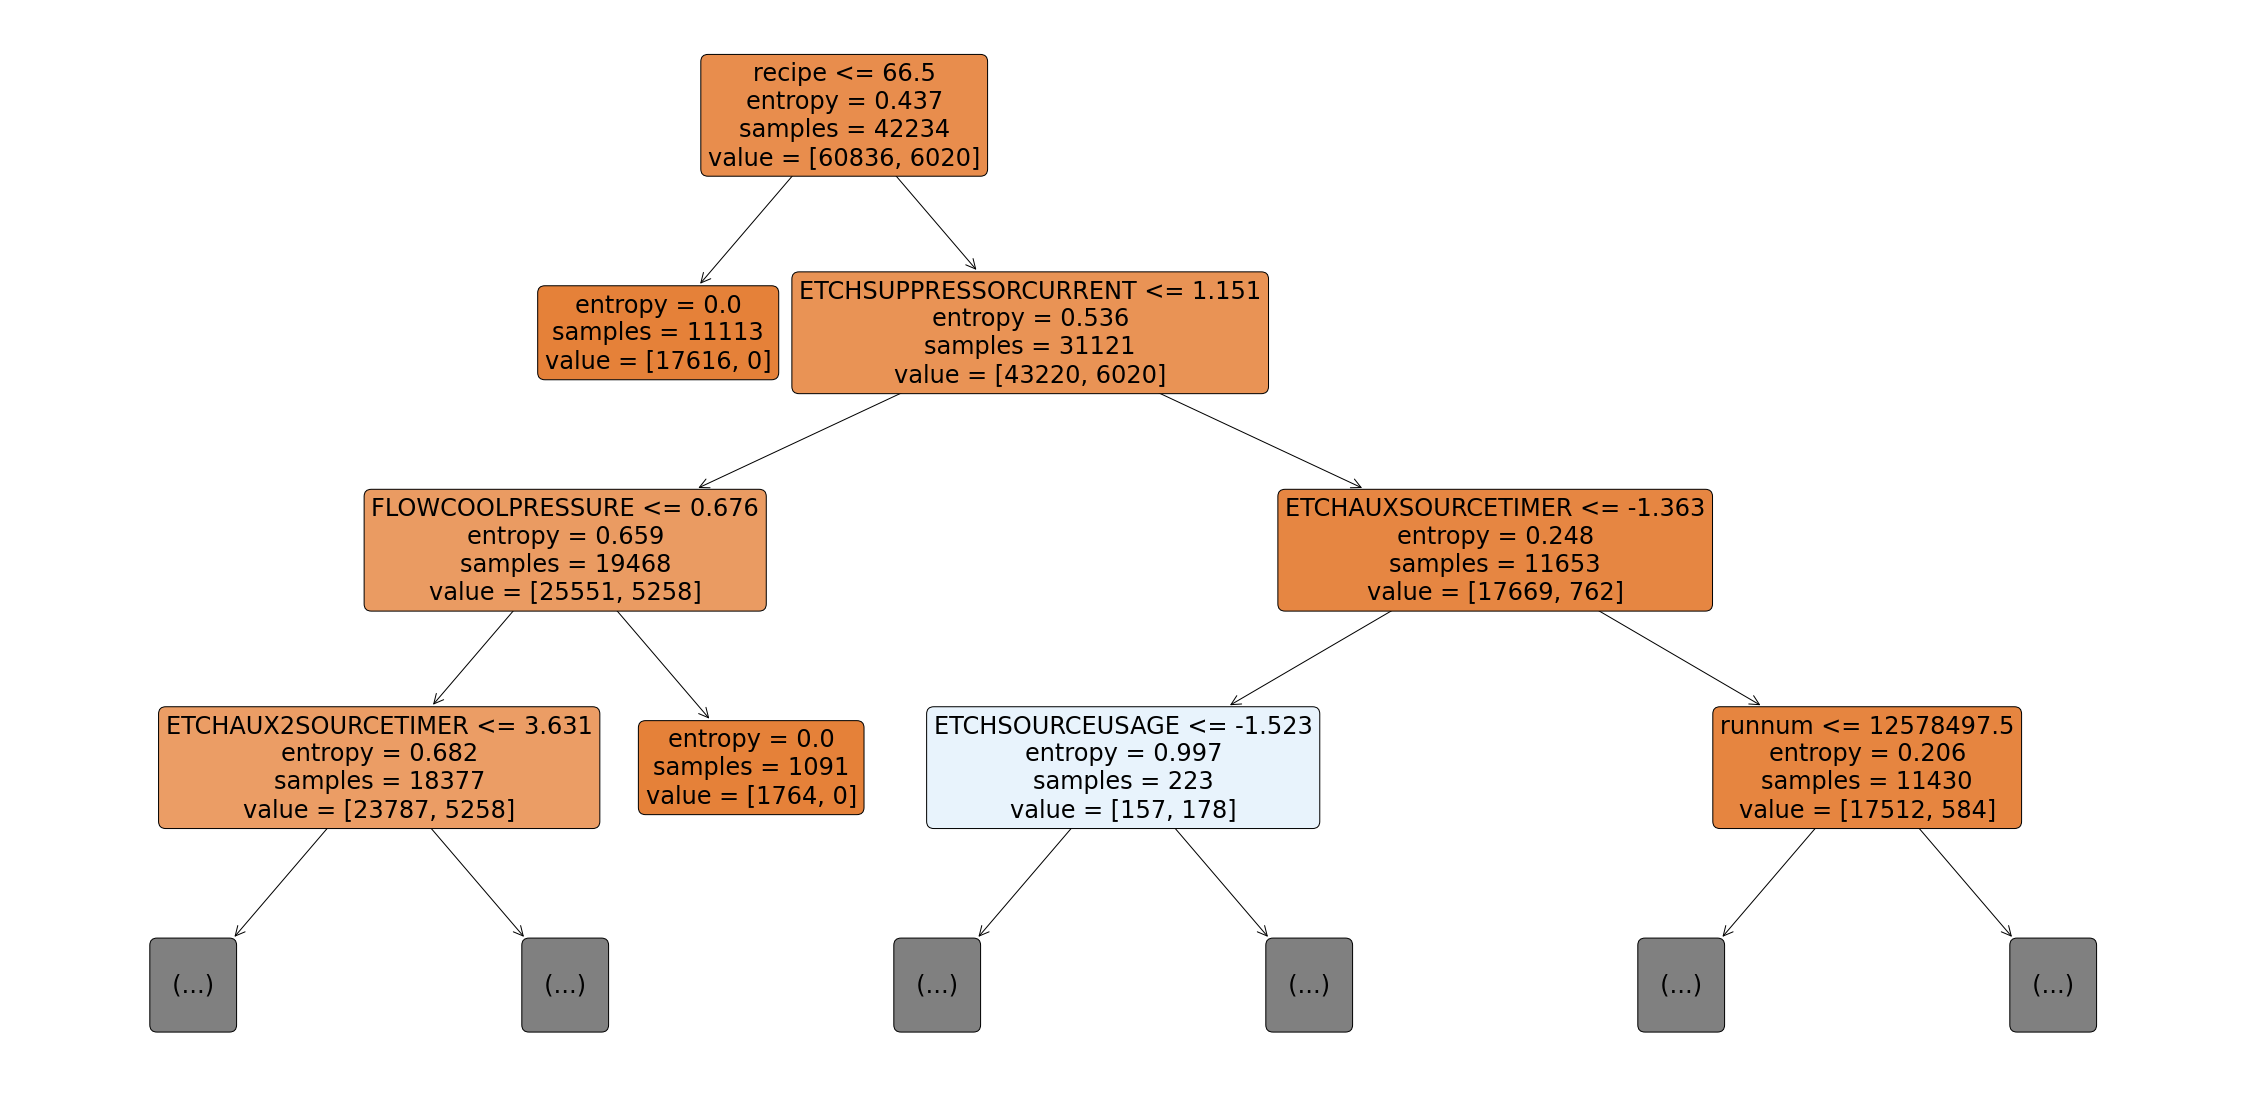

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(RFC.estimators_[0], feature_names = df1.columns, 
             filled=True, fontsize=24, rounded = True, max_depth = 3)
plt.show()

In [ ]:
y_pred = RFC.predict(df_stream)
df_stream_test = df_stream['IsFailure']

In [ ]:
df_stream

,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ACTUALROTATIONANGLE,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,IsFailure
126544,1,9287,10546196,66,3,-0.048083,-0.951193,-0.959297,-0.947570,-0.939043,...,-0.061544,0.360776,-0.200727,-0.122455,2.773047,3.294121,3.615297,-0.667540,19996.0,0.0
126545,1,9287,10546196,66,3,-0.048083,-0.951023,-0.959368,-0.947616,-0.939043,...,-0.058299,0.360776,-0.200727,-0.122455,2.773050,3.294123,3.615298,-0.667540,19992.0,0.0
126546,1,9287,10546196,66,3,-0.048083,-0.950738,-0.958658,-0.947524,-0.939043,...,-0.058299,0.360776,-0.200727,-0.122455,2.773053,3.294126,3.615302,-0.667540,19988.0,0.0
126547,1,9287,10546196,66,3,-0.048083,-0.951023,-0.958729,-0.947570,-0.939043,...,-0.058299,0.359727,-0.200727,-0.122455,2.773057,3.294132,3.615308,-0.667540,19984.0,0.0
126548,1,9287,10546196,66,3,-0.048083,-0.950966,-0.958942,-0.947524,-0.939043,...,-0.060052,0.359727,-0.200727,-0.122455,2.773060,3.294137,3.615314,-0.667540,19980.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624458,1,9605,12645359,67,47,-0.035683,-0.243963,0.320502,1.501067,0.592425,...,0.731594,0.362004,0.022131,-0.122455,0.988414,1.288360,1.530058,0.803526,368.0,1.0
4624459,1,9605,12645359,67,47,-0.035683,-0.243963,0.315538,1.501295,0.588989,...,0.731594,0.359727,0.022131,-0.122455,0.988417,1.288363,1.530061,0.803526,364.0,1.0
4624460,1,9605,12645359,67,47,-0.035683,-0.244531,0.313195,1.501110,0.594485,...,0.734840,0.359727,0.022131,-0.122455,0.988421,1.288367,1.530065,0.803526,360.0,1.0
4624461,1,9605,12645359,67,47,-0.035683,-0.243677,0.316741,1.501388,0.590359,...,0.734840,0.359727,0.022131,-0.122455,0.988424,1.288371,1.530069,0.803526,356.0,1.0


In [ ]:
#test with points right around the pass -> fail area
df_test = df1.loc[df1['TTF_FlowCool Pressure Dropped Below Limit'] <= 600]
df_test = df_test.loc[df_test['TTF_FlowCool Pressure Dropped Below Limit'] >= 400]
cutoff = df_test.where(df_test['TTF_FlowCool Pressure Dropped Below Limit']==600).last_valid_index()
cutoff_test = df_test.loc[cutoff:]
cutoff_real = cutoff_test['TTF_FlowCool Pressure Dropped Below Limit']
cutoff_pred= cutoff_test.drop('TTF_FlowCool Pressure Dropped Below Limit', axis=1)

y_prediction =  rf.predict(cutoff_pred)

#print(confusion_matrix(y_test, y_pred))
score=r2_score(cutoff_real,y_prediction)
print('r2 score is:',score)
print('mean_sqrd_error is:',mean_squared_error(cutoff_real,y_prediction))
print('root_mean_squared error of is:',np.sqrt(mean_squared_error(cutoff_real,y_prediction)))

r2 score is: 0.9965856719225945
mean_sqrd_error is: 14.509736585365836
root_mean_squared error of is: 3.809164814676025


# VISUALIZATIONS AND ANALYSIS

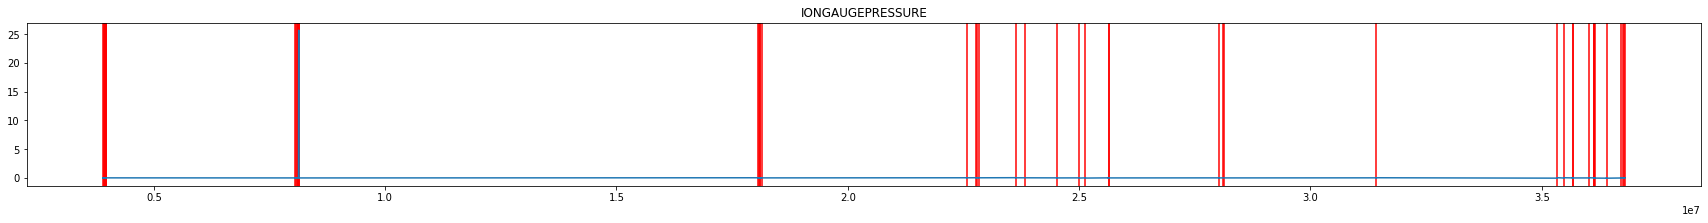

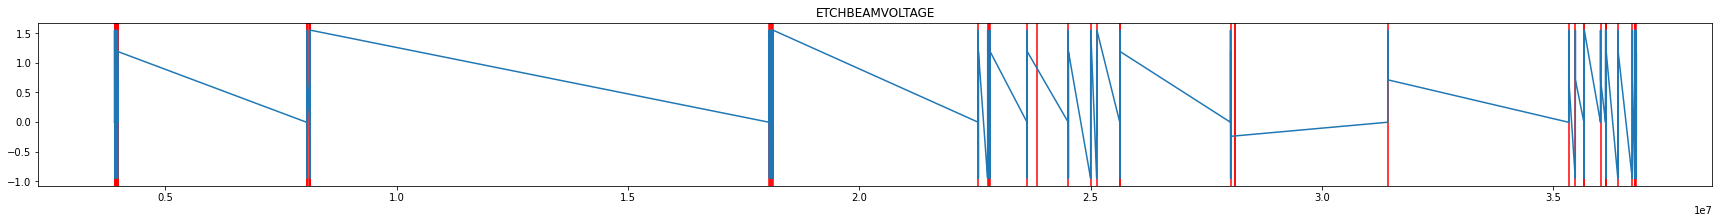

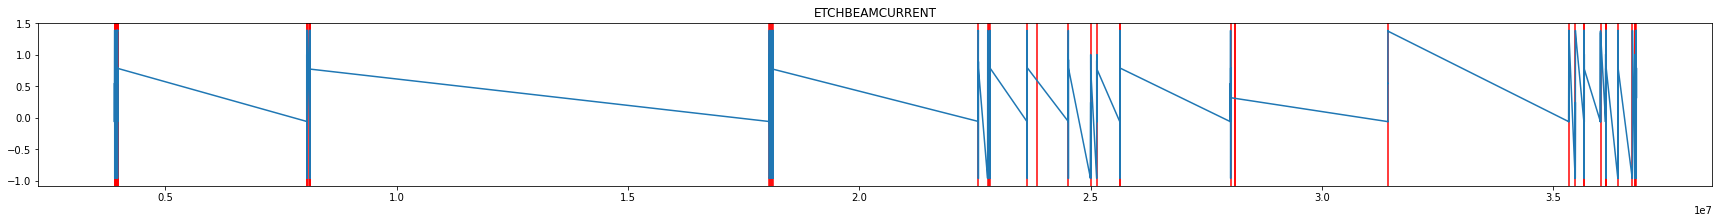

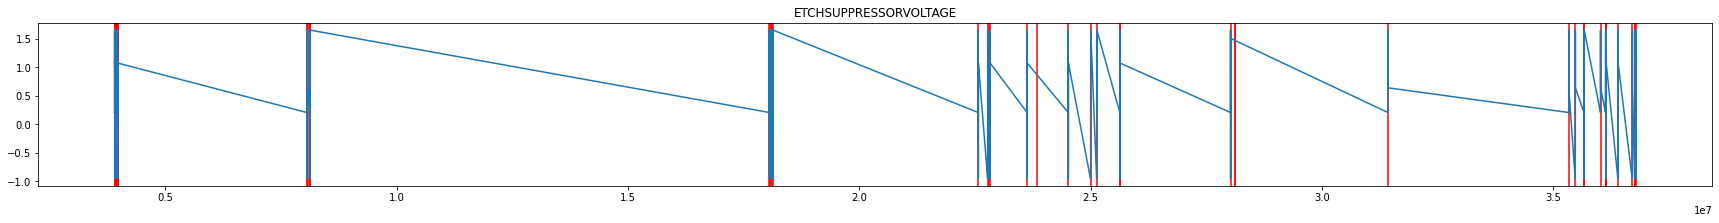

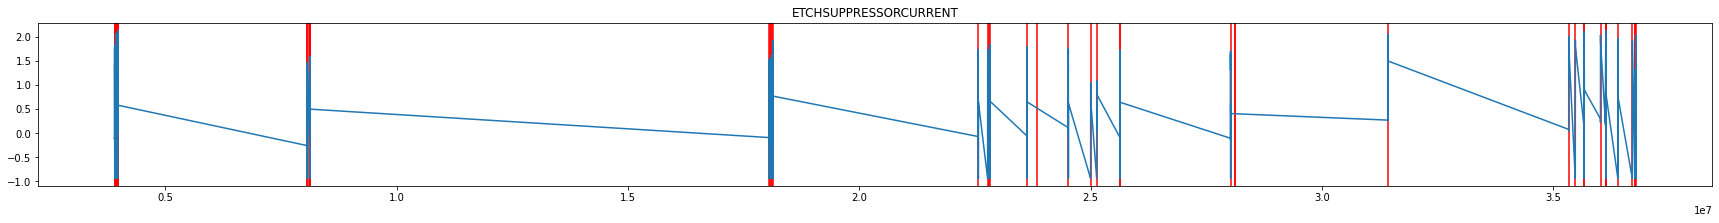

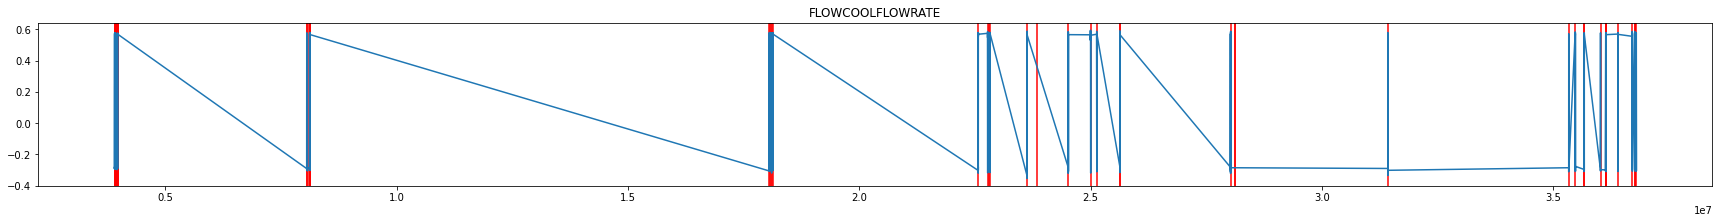

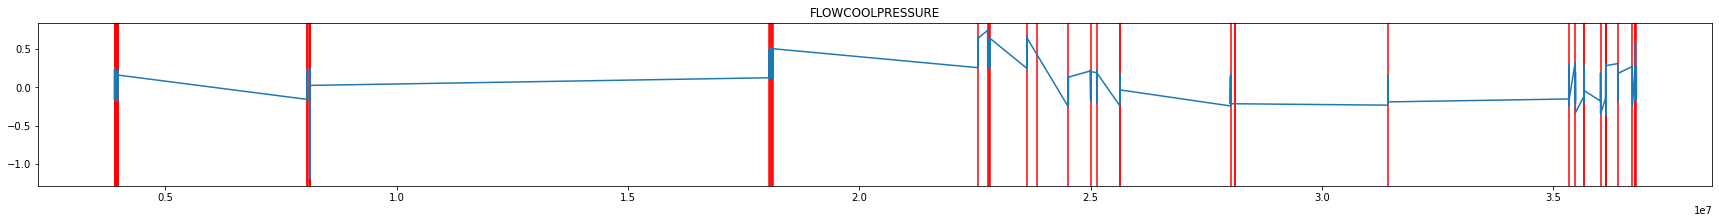

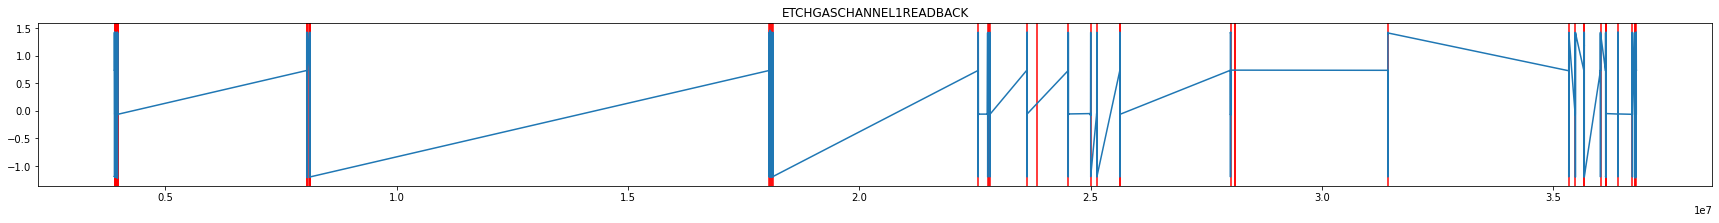

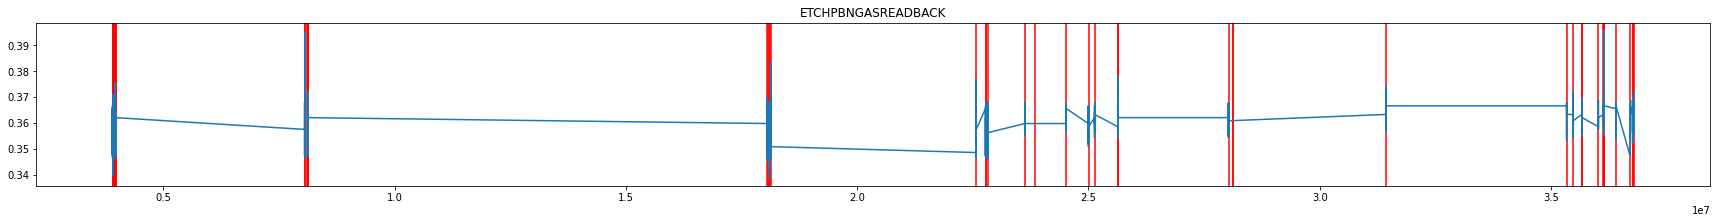

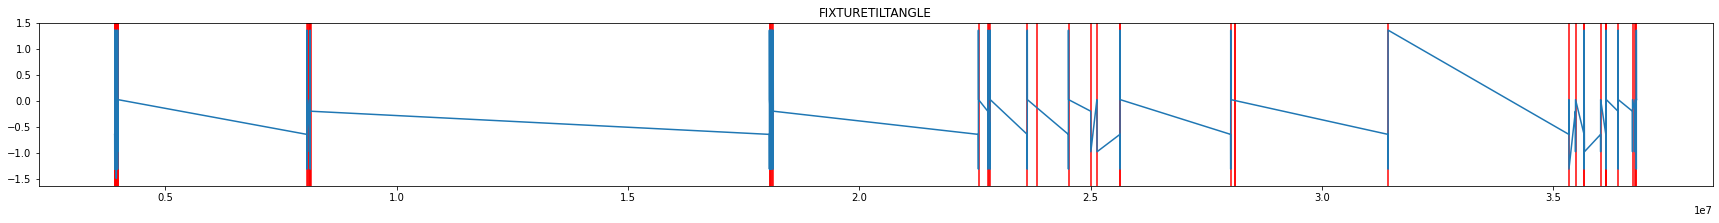

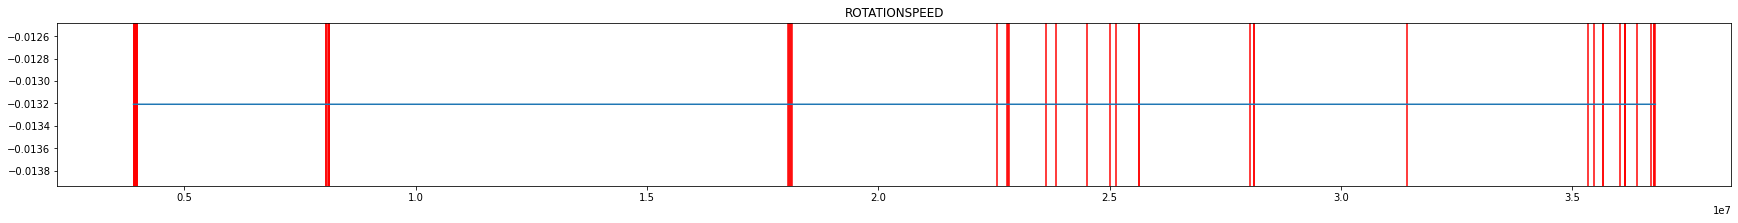

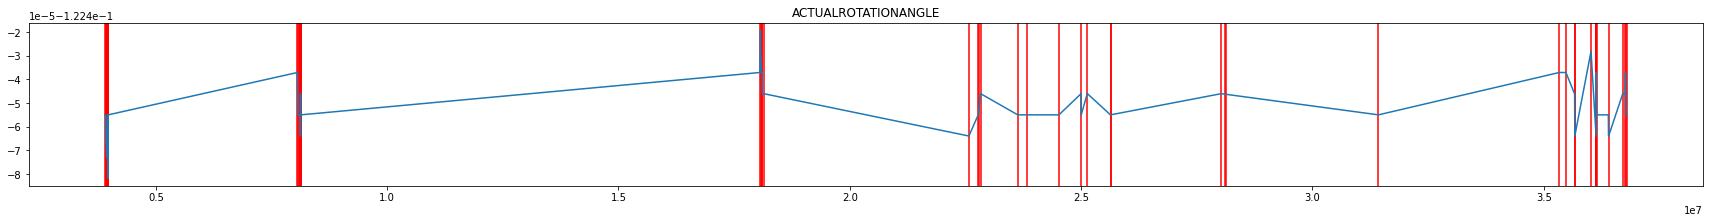

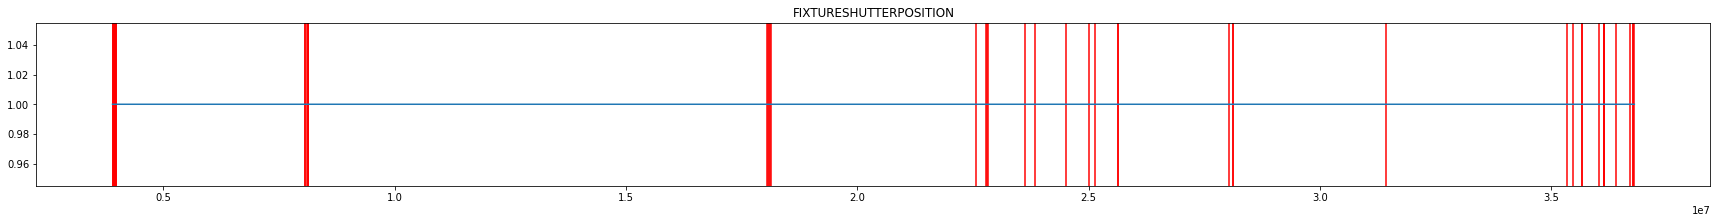

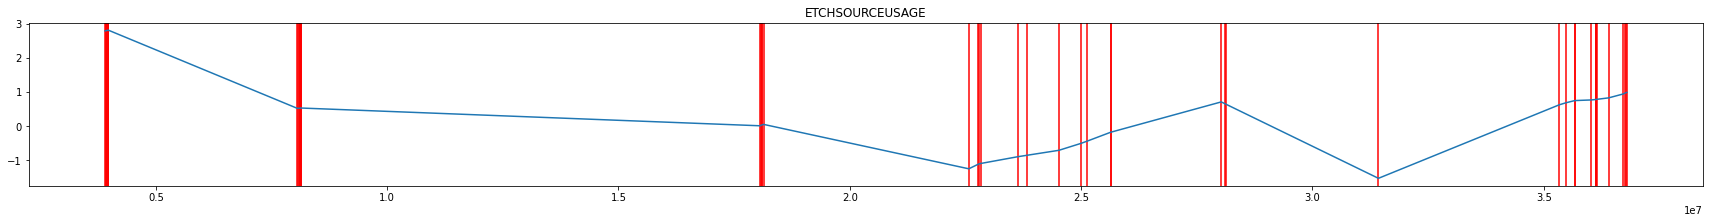

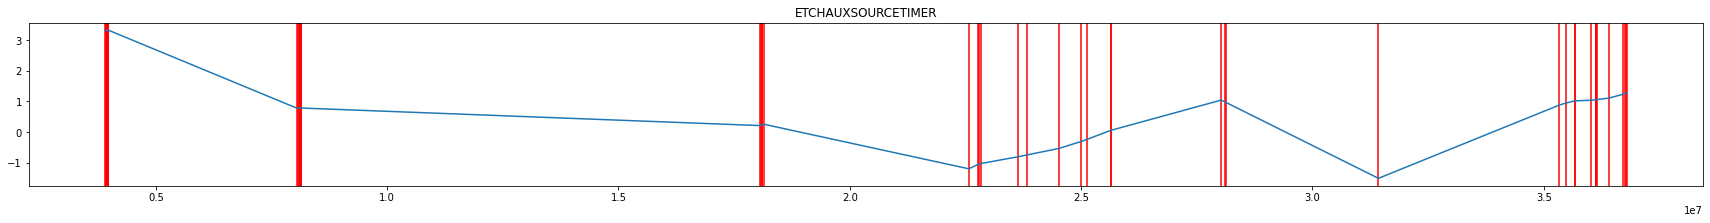

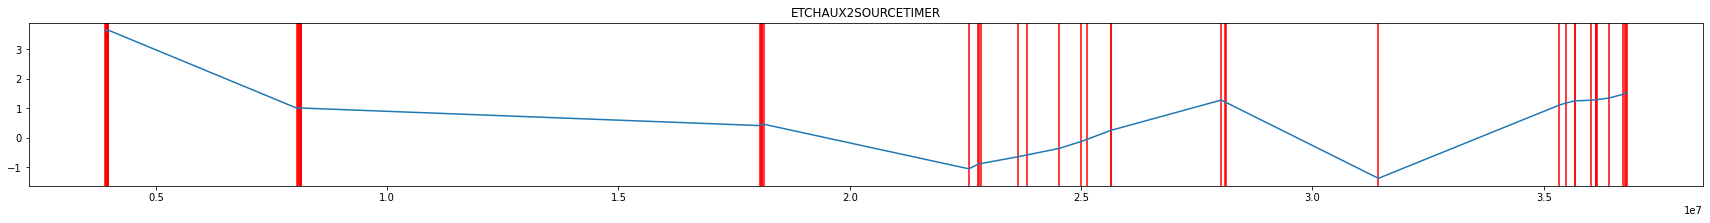

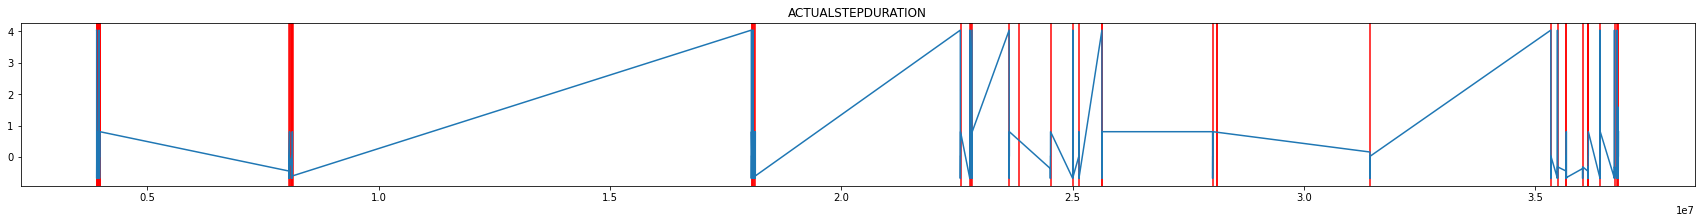

In [ ]:
#prod
#FlowCool Pressure Dropped Below Limit graph and failures
for column in df_f1.columns[7:24]:
  plt.figure(figsize = (30, 3))
  for i in df_fault.index:
    if df_fault['fault_name'][i] == 'FlowCool Pressure Dropped Below Limit':
      plt.axvline(x = df_fault['time'][i], color = 'red')
  plt.plot(df_f1['time'], df_f1[column])
  plt.title(column)

  plt.show()

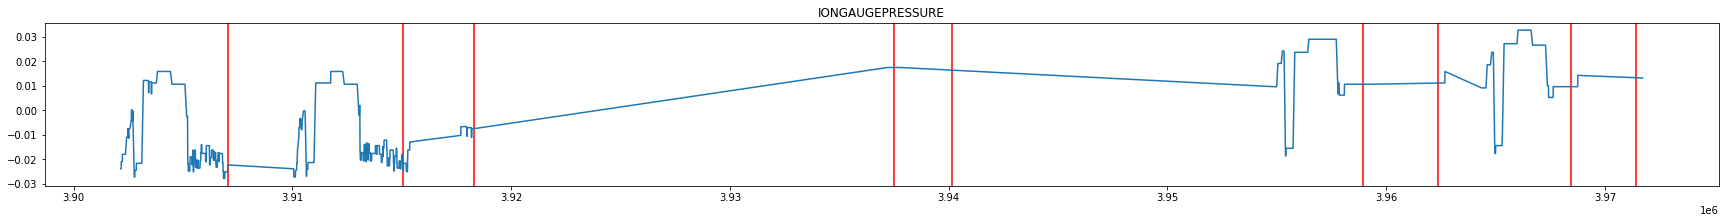

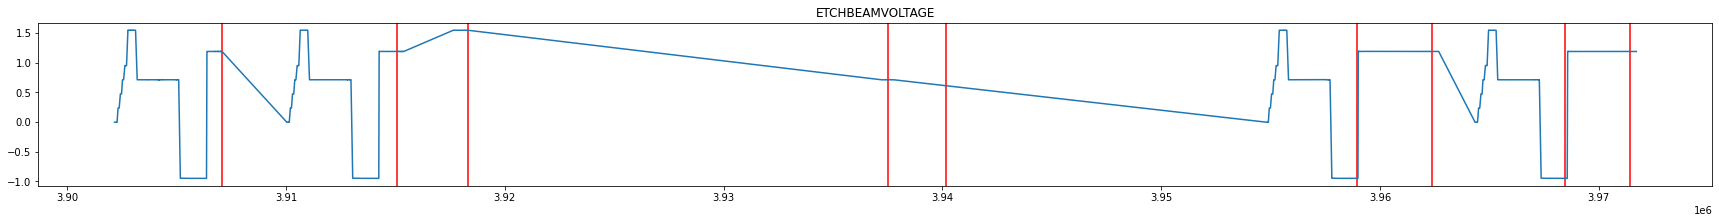

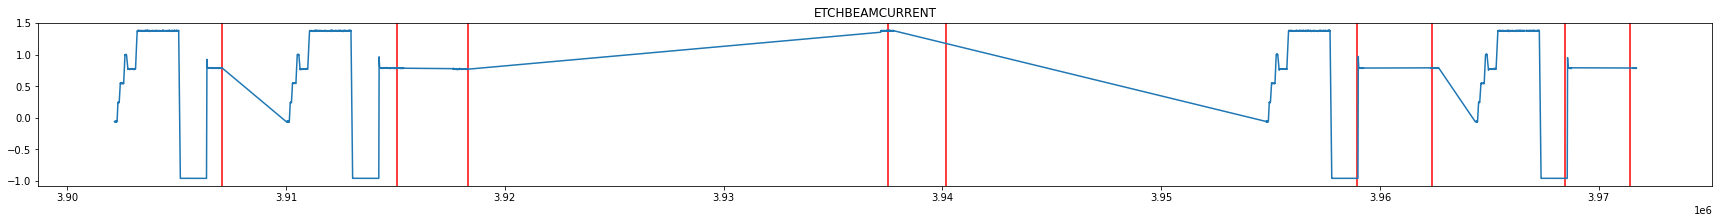

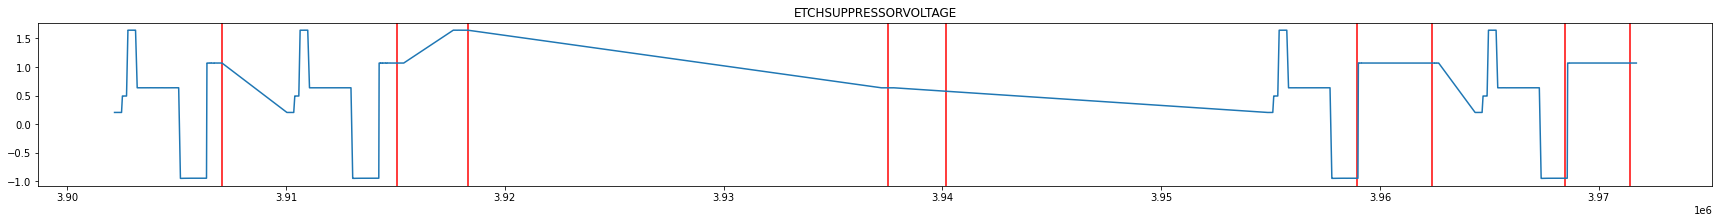

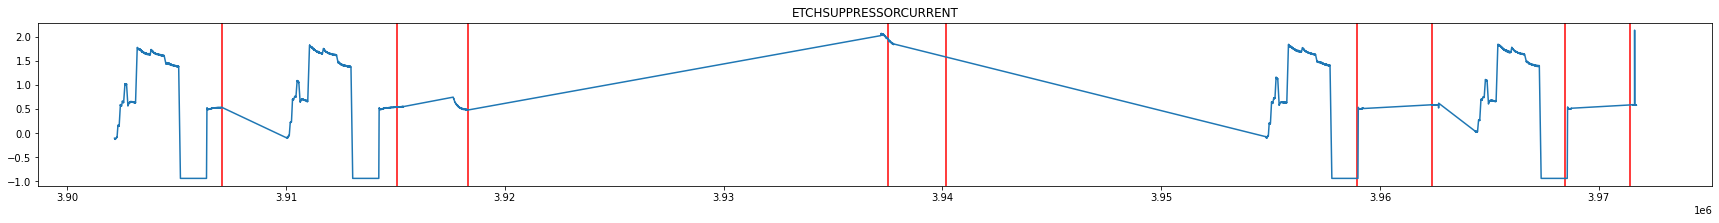

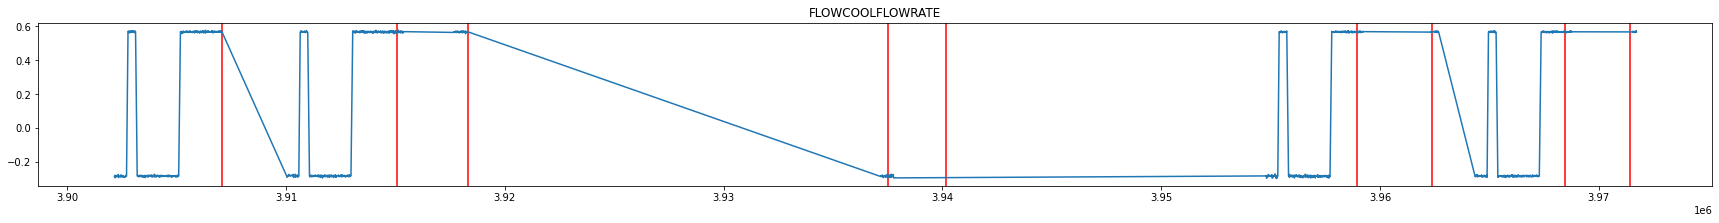

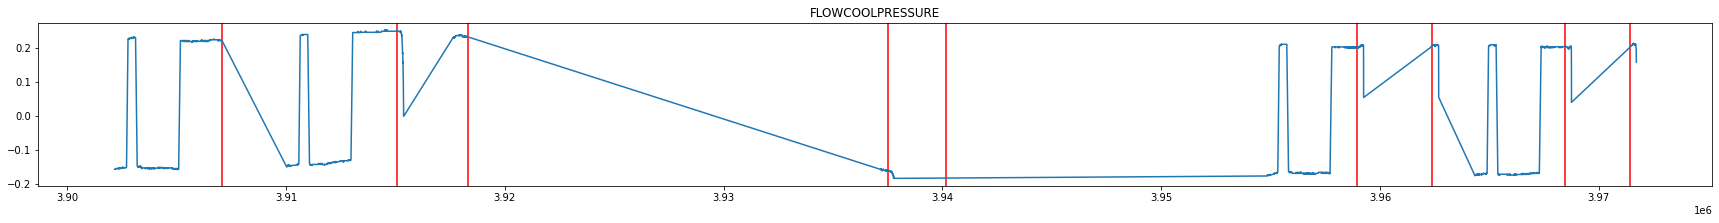

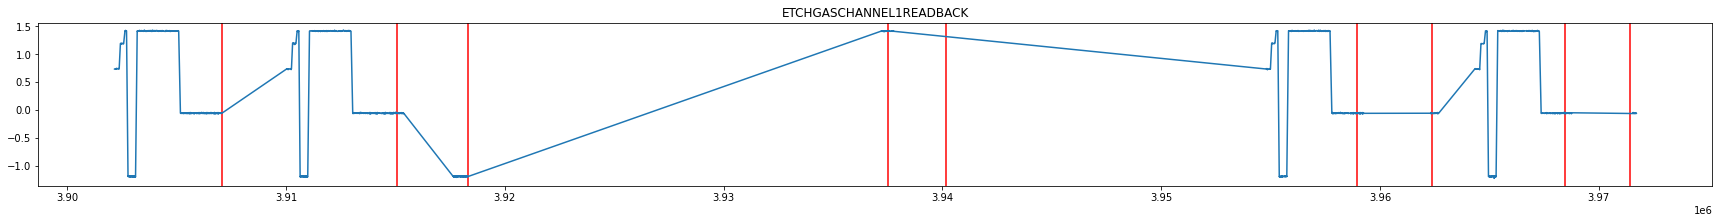

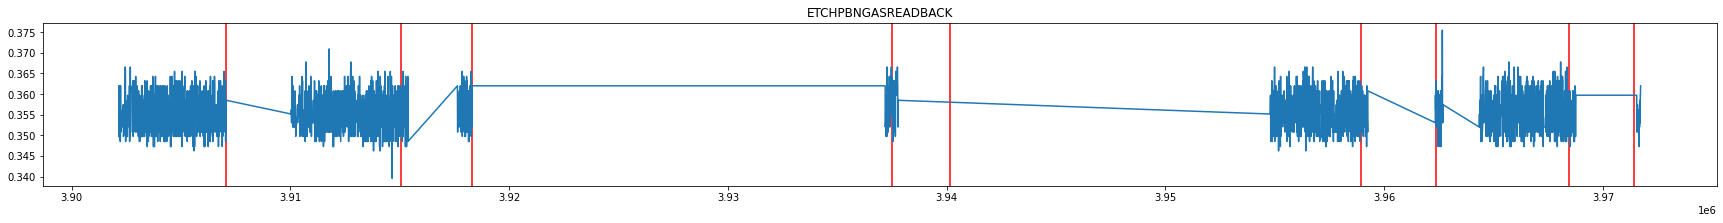

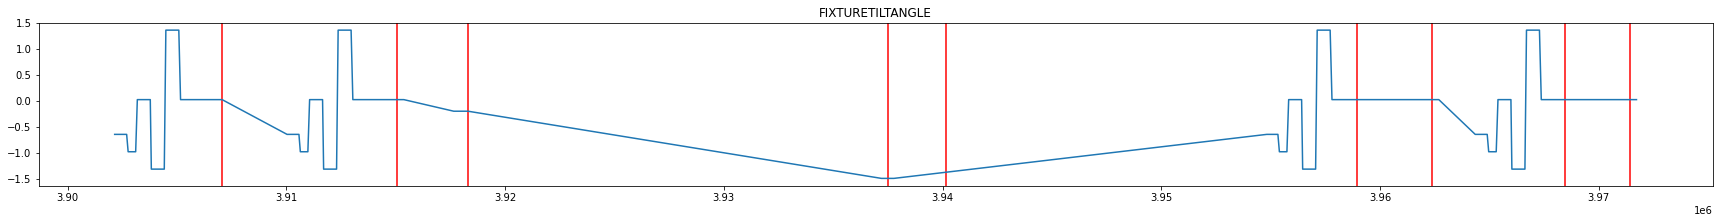

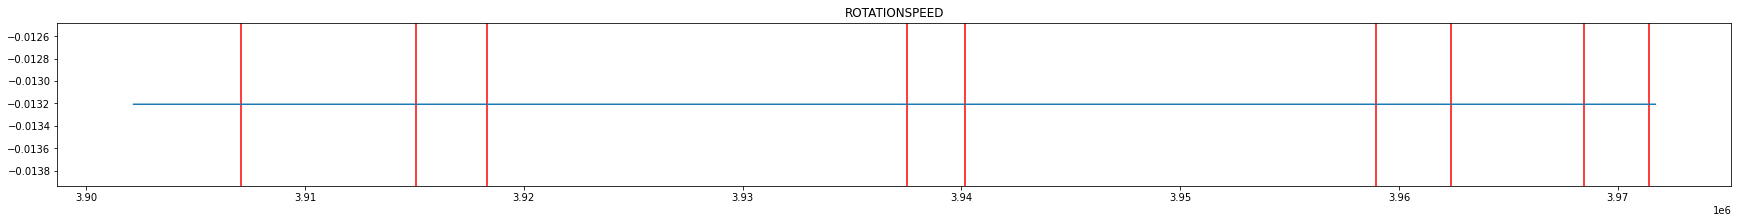

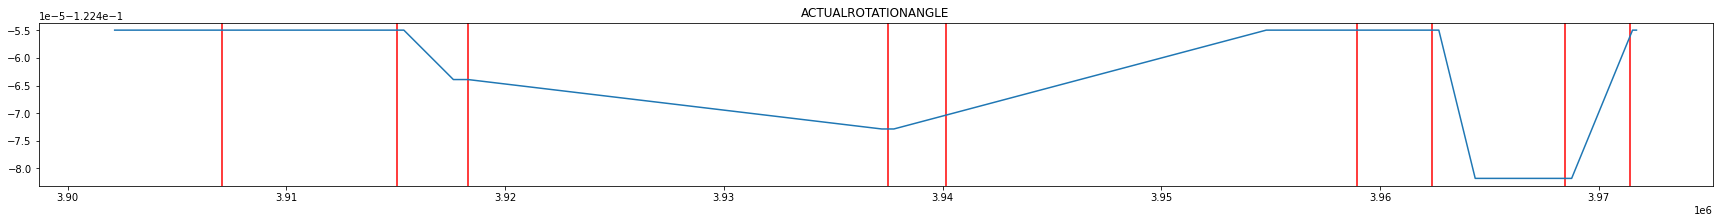

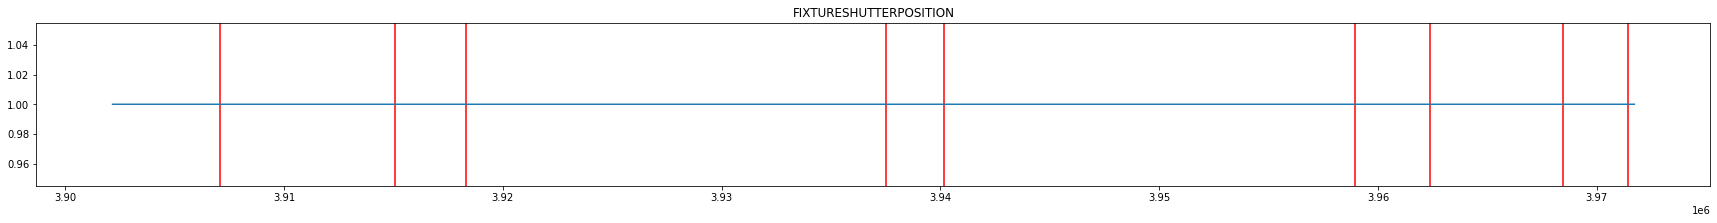

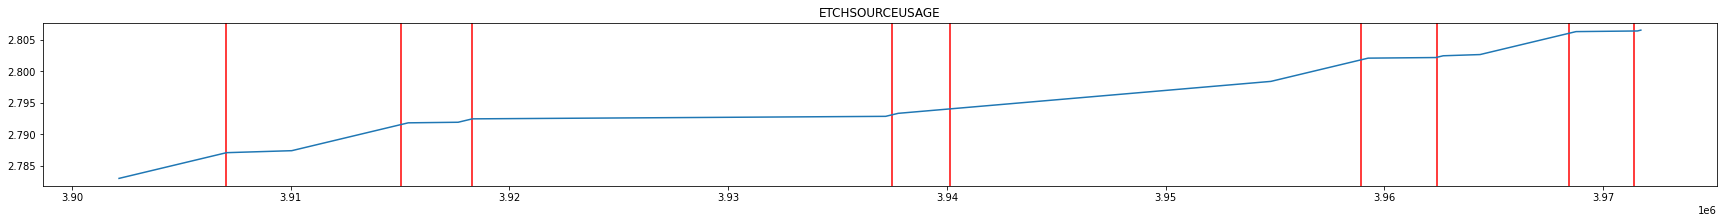

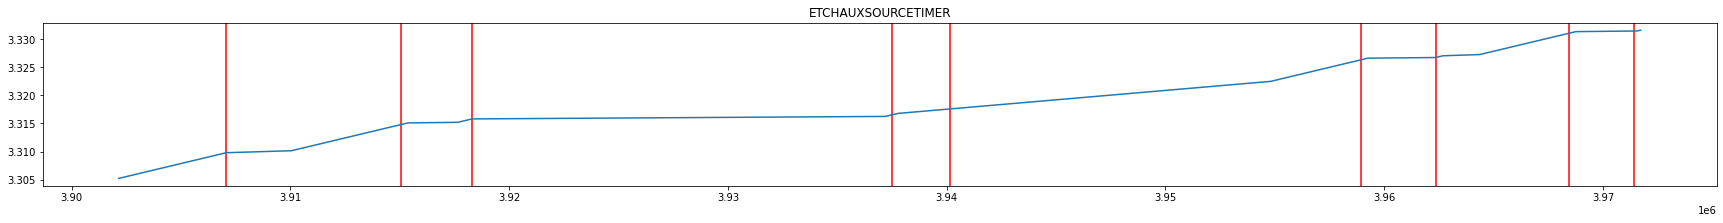

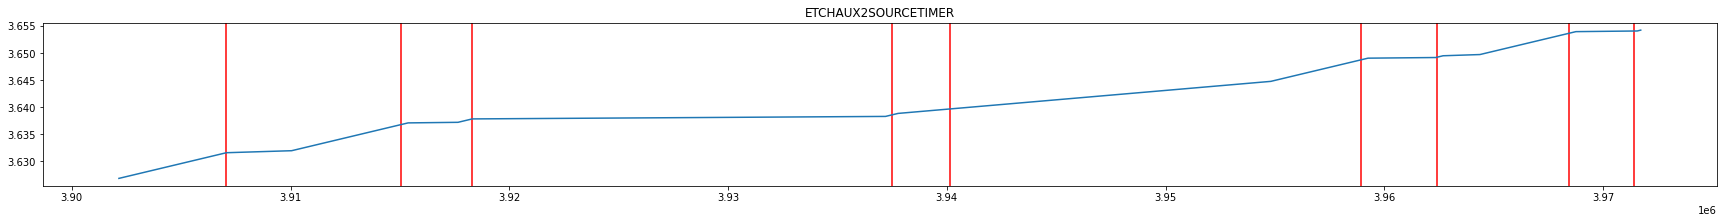

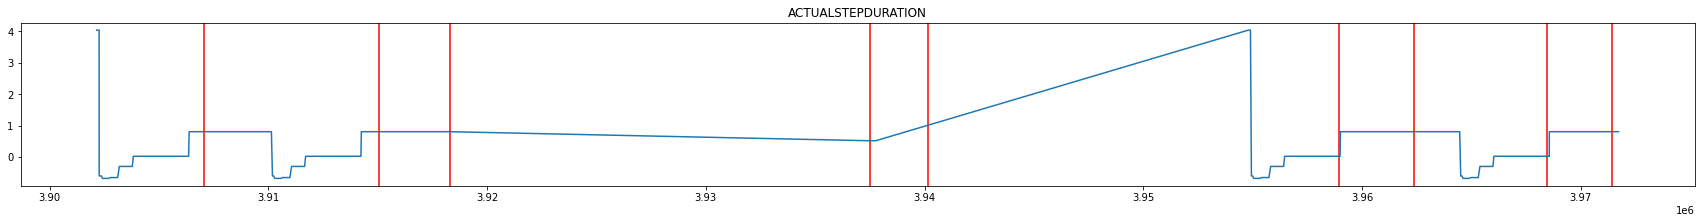

In [ ]:
#zooming into first cluster of failures of type f1
df_testf1 = df_f1.loc[df_f1['time'] < 3973348]
df_testfault = df_fault.loc[df_fault['time'] < 3973348]

for column in df_testf1.columns[7:24]:
  plt.figure(figsize = (30, 3))
  for i in df_testfault.index:
    if df_testfault['fault_name'][i] == 'FlowCool Pressure Dropped Below Limit':
      plt.axvline(x = df_testfault['time'][i], color = 'red')
  plt.plot(df_testf1['time'], df_testf1[column])
  plt.title(column)

  plt.show()

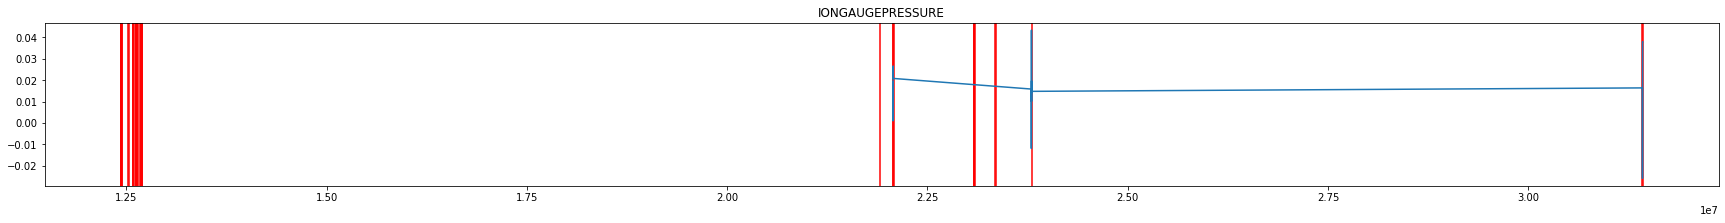

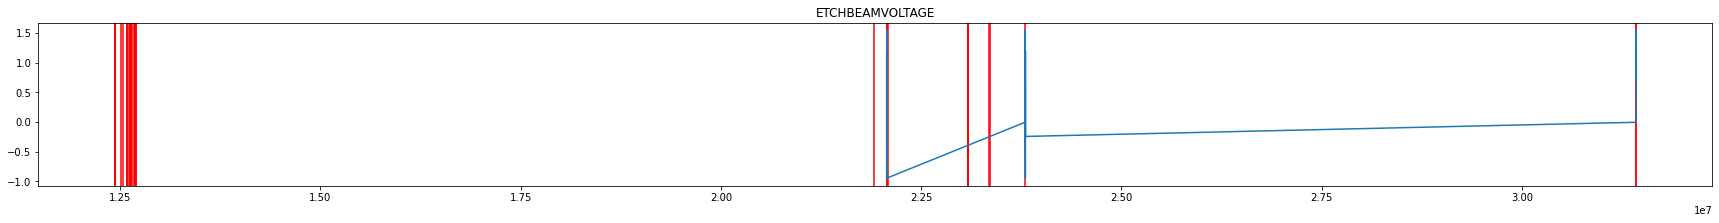

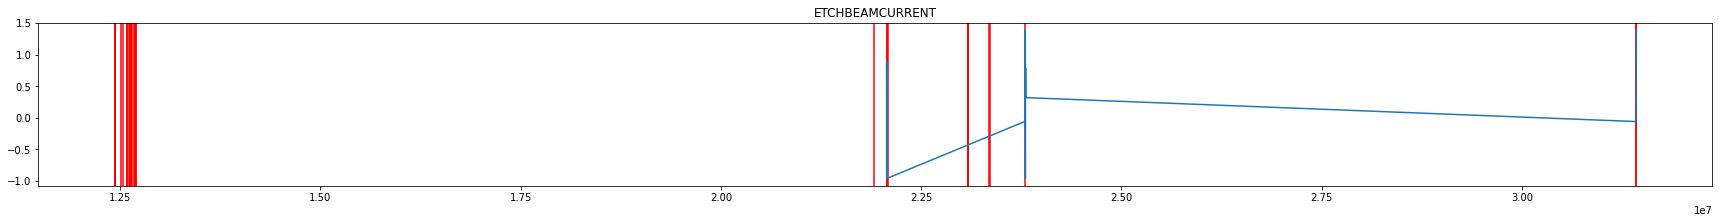

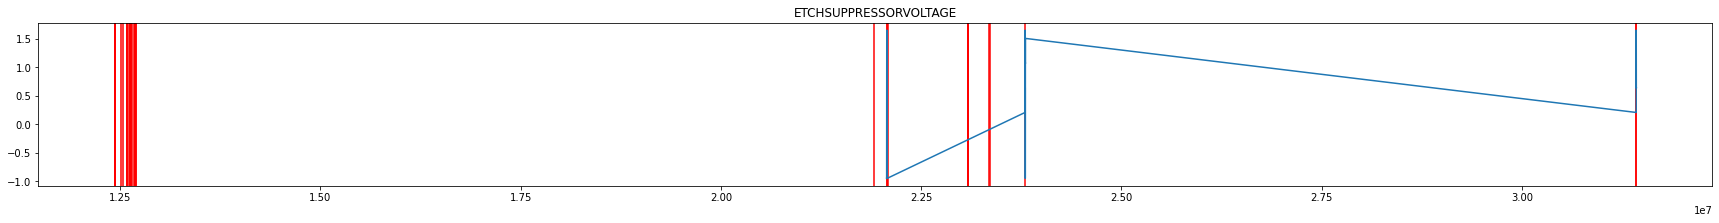

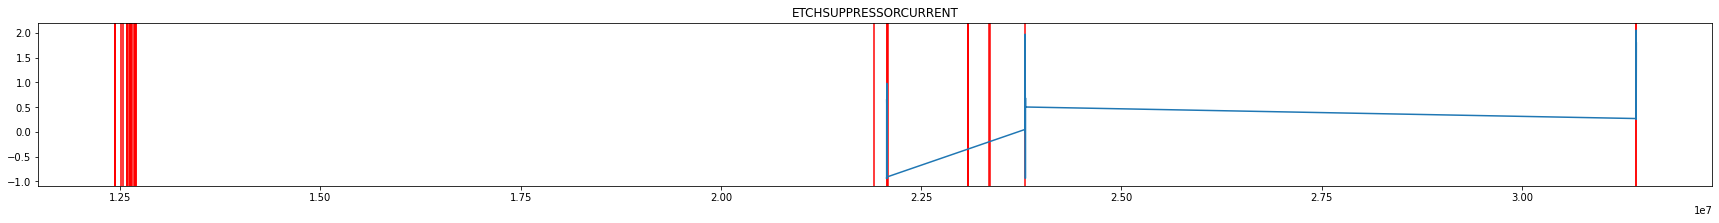

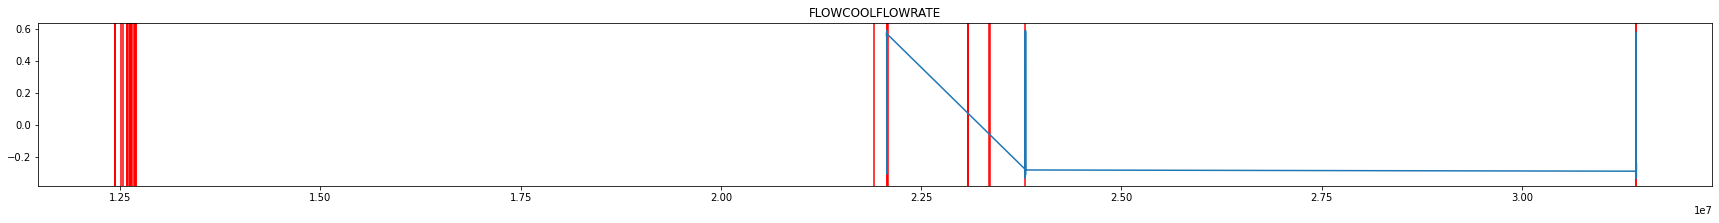

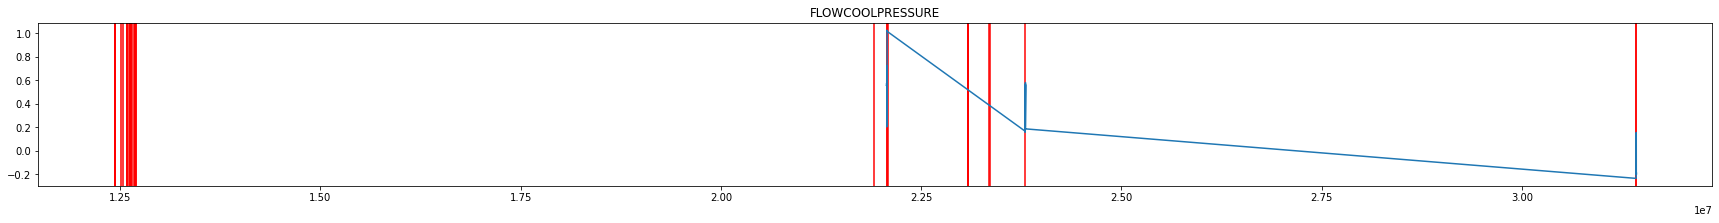

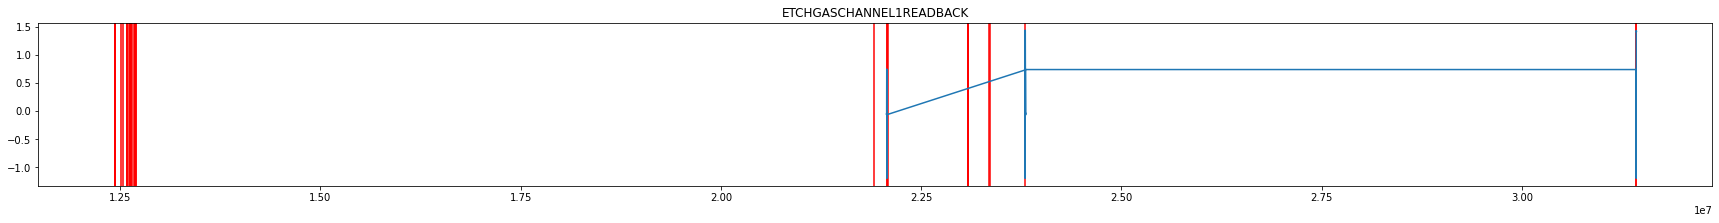

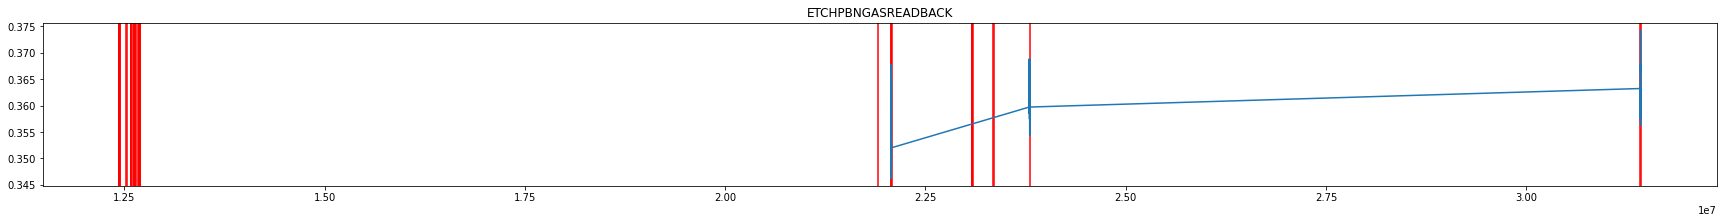

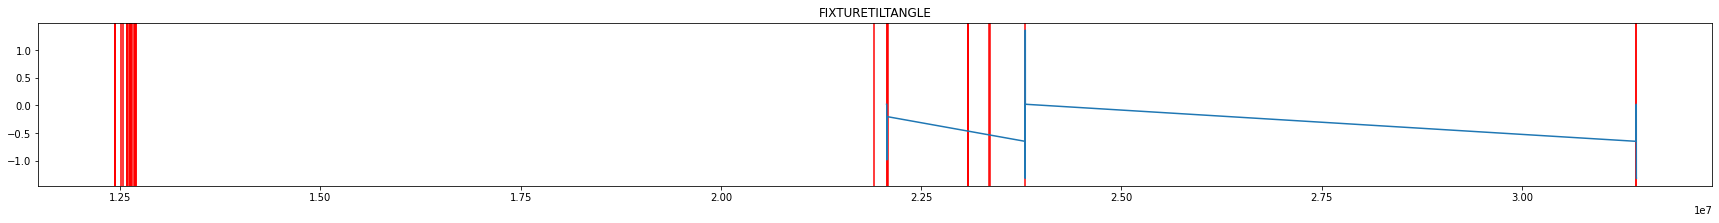

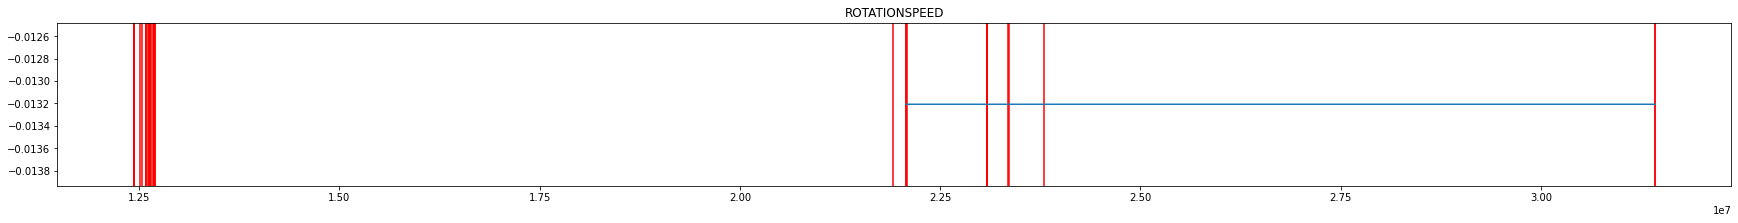

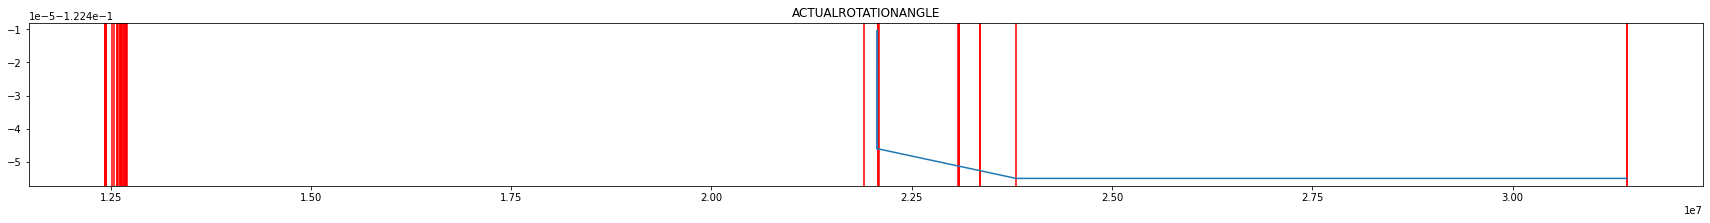

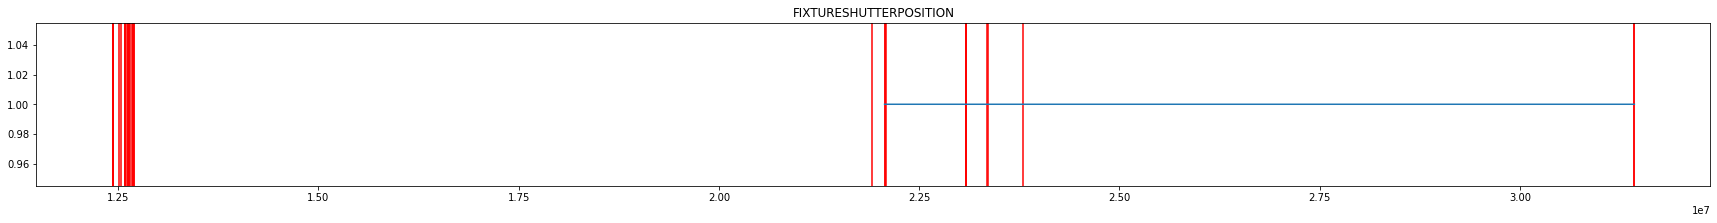

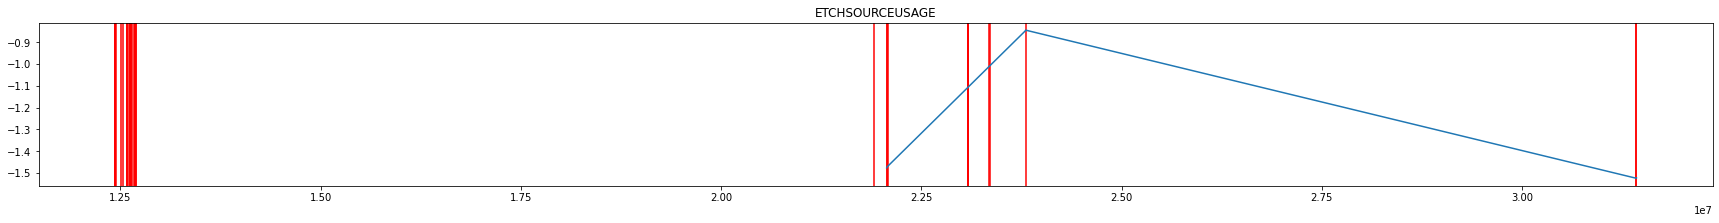

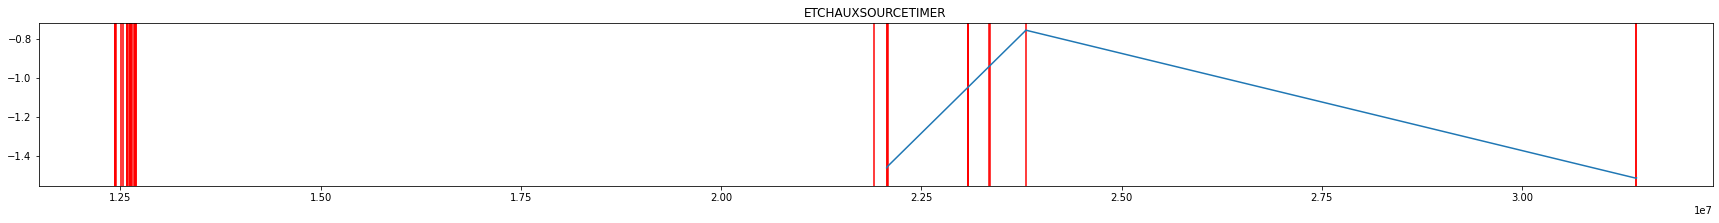

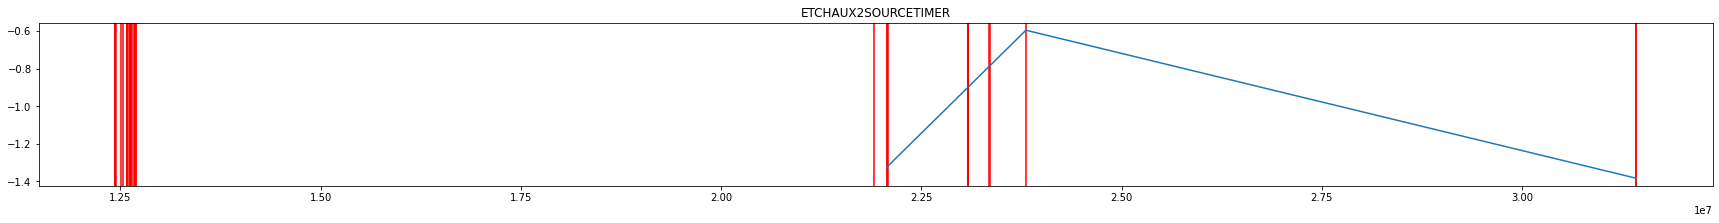

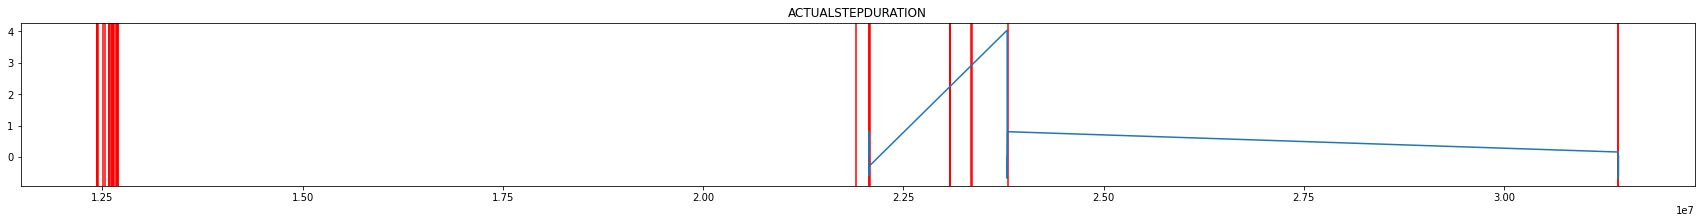

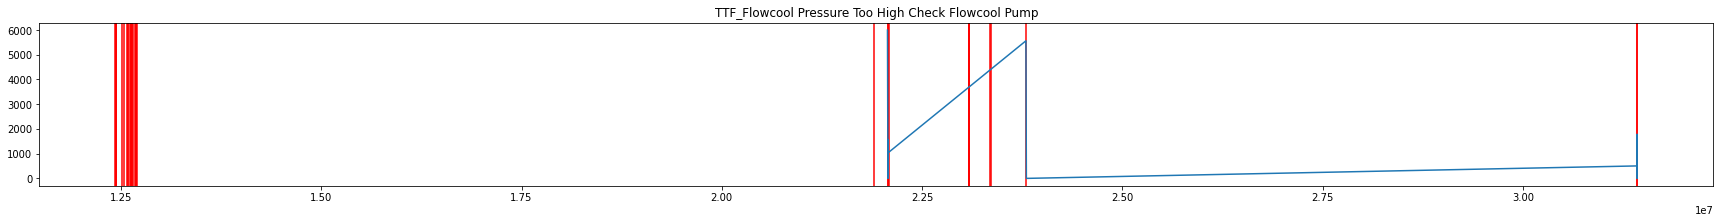

In [ ]:
#Flowcool Pressure Too High Check Flowcool Pump graph and failures
for column in df_f2.columns[7:25]:
  plt.figure(figsize = (30, 3))
  for i in df_fault.index:
    if df_fault['fault_name'][i] == 'Flowcool Pressure Too High Check Flowcool Pump':
      plt.axvline(x = df_fault['time'][i], color = 'red')
  plt.plot(df_f2['time'], df_f2[column])
  plt.title(column)

  plt.show()

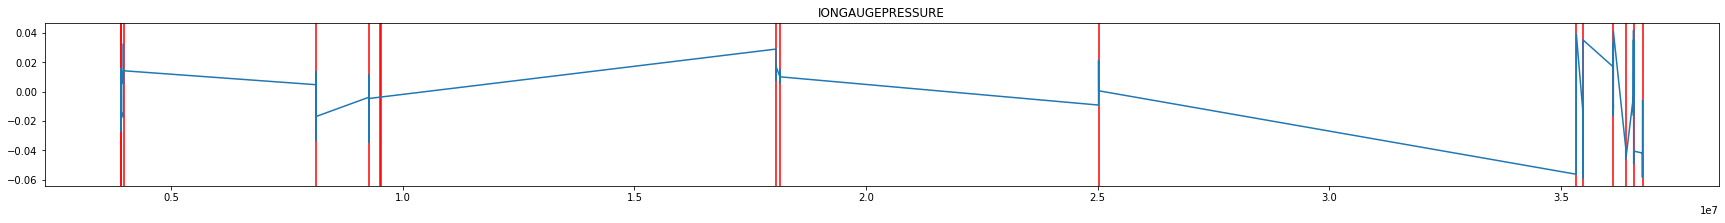

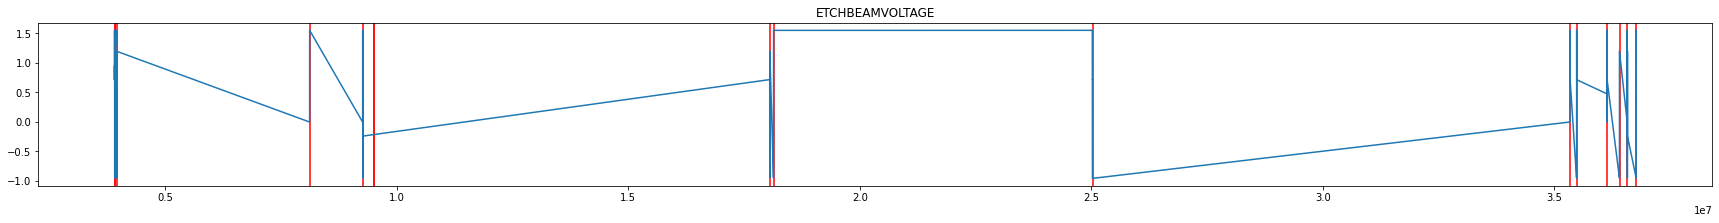

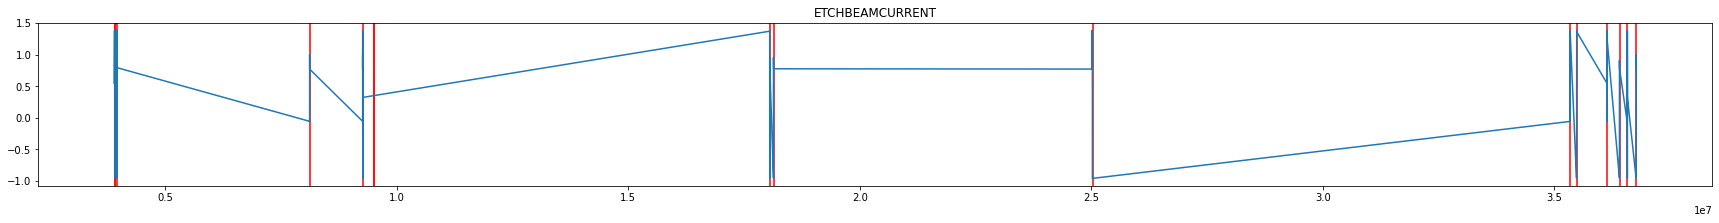

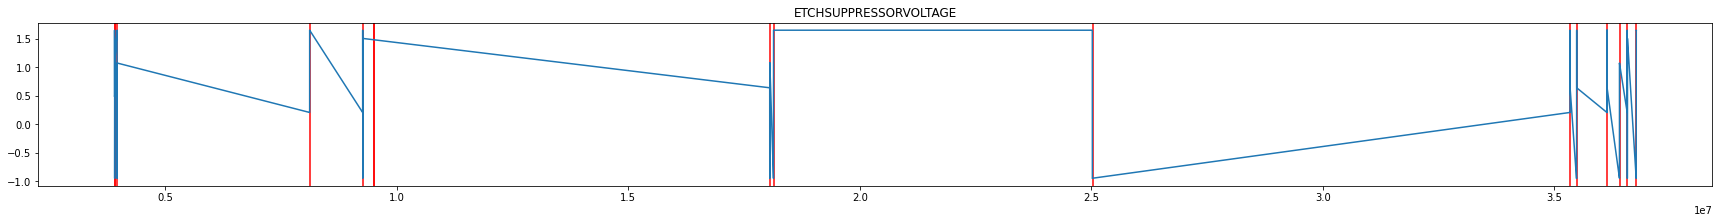

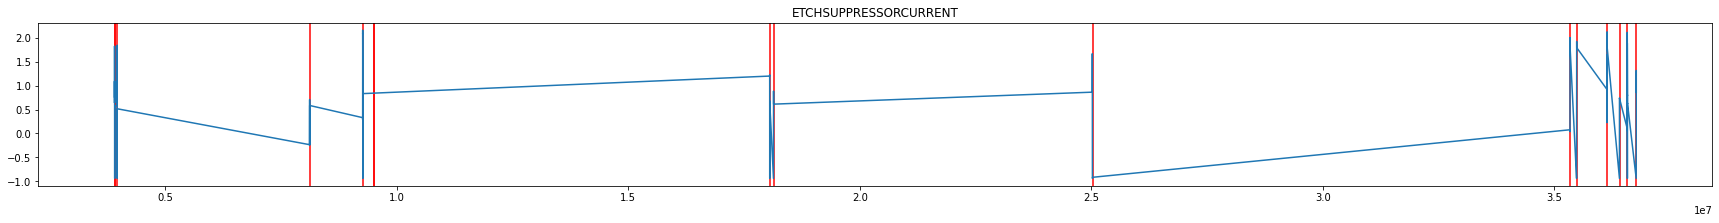

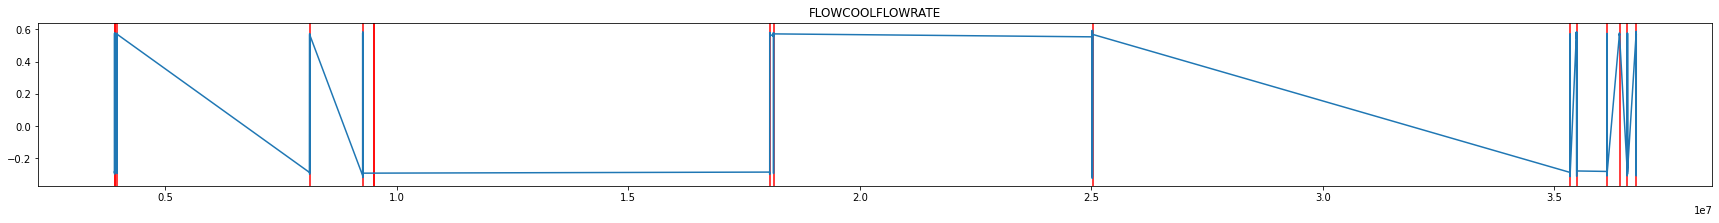

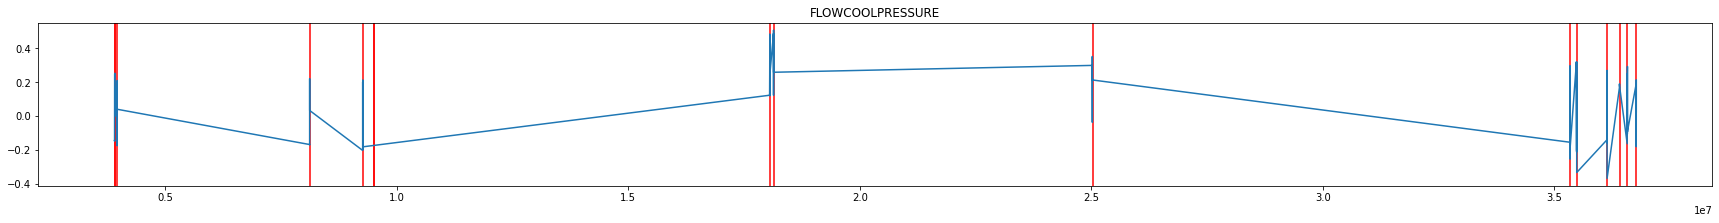

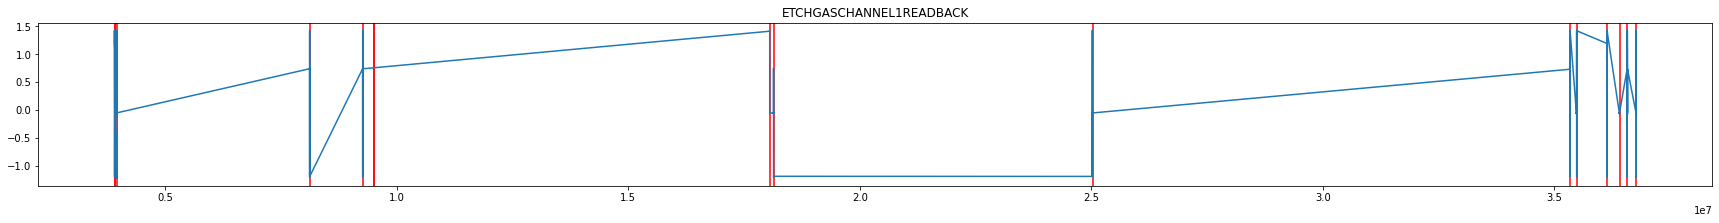

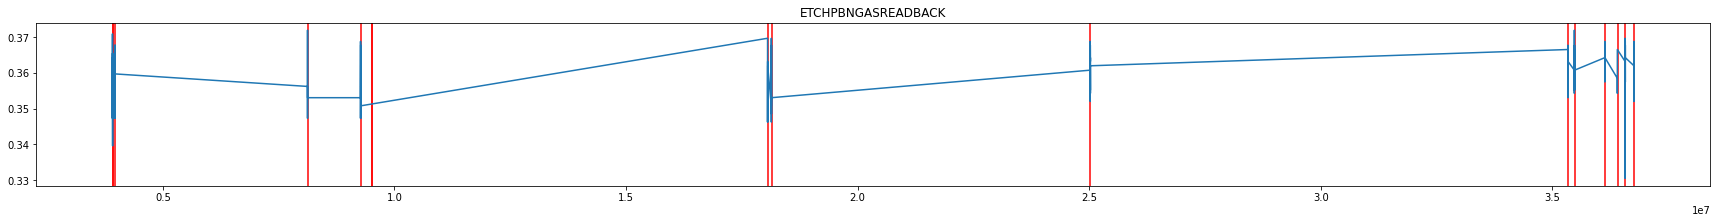

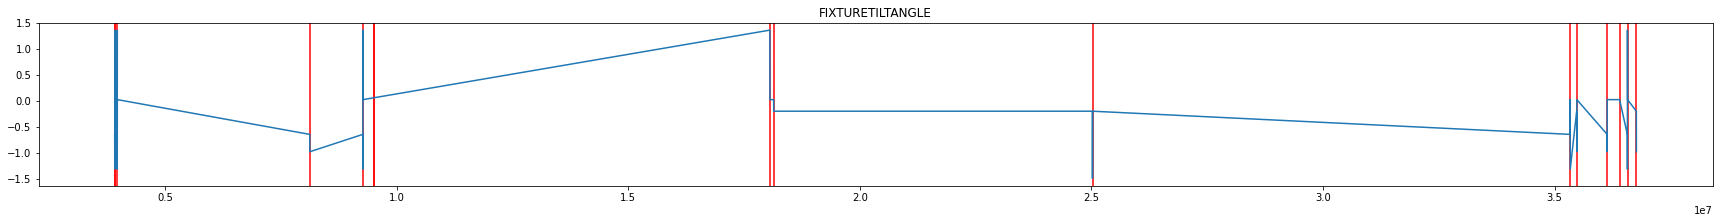

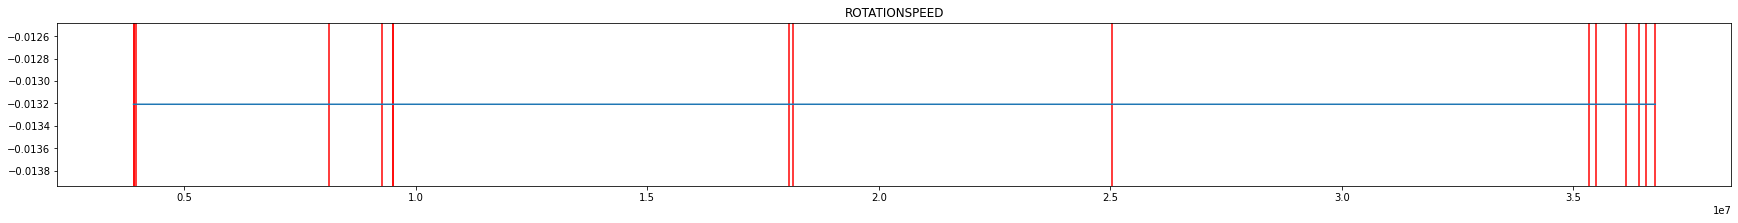

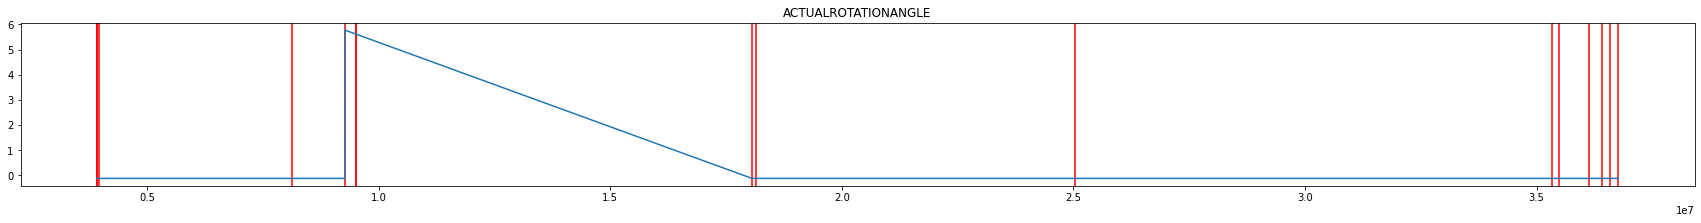

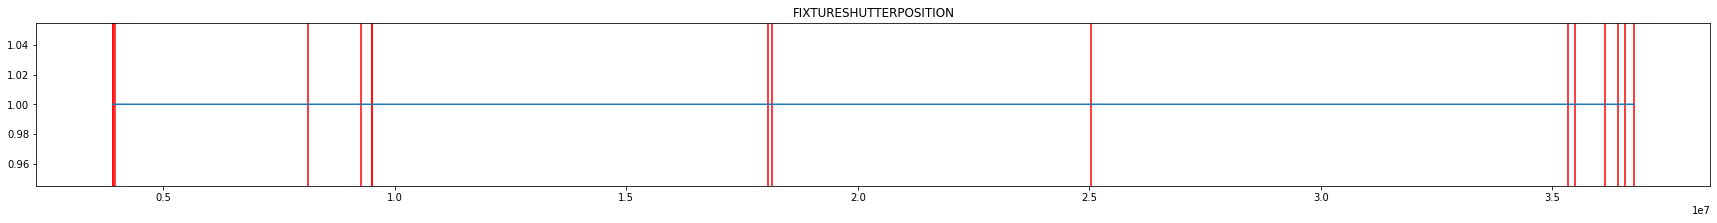

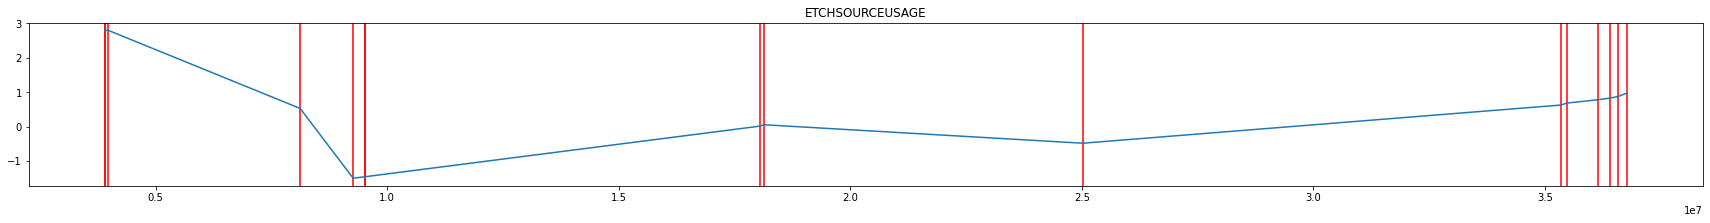

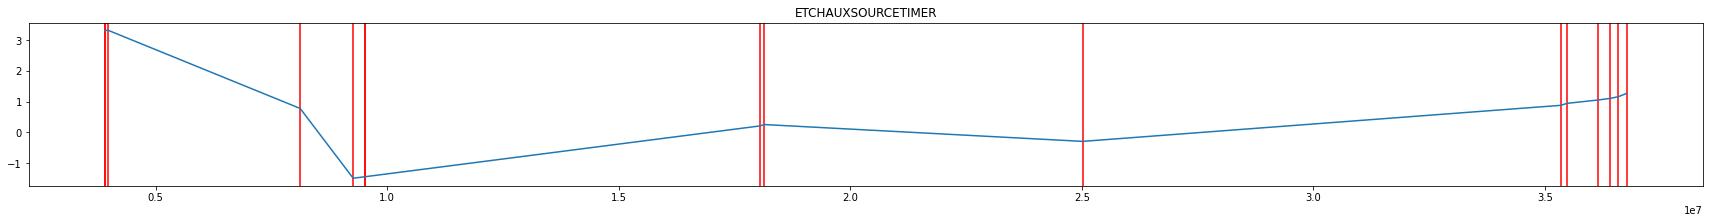

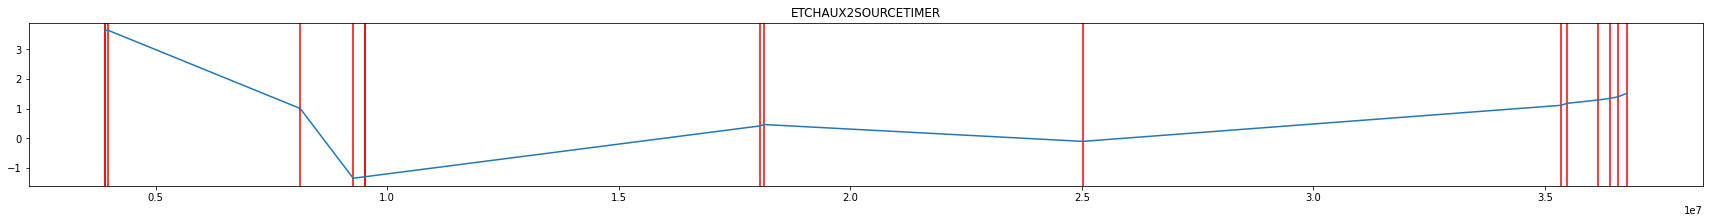

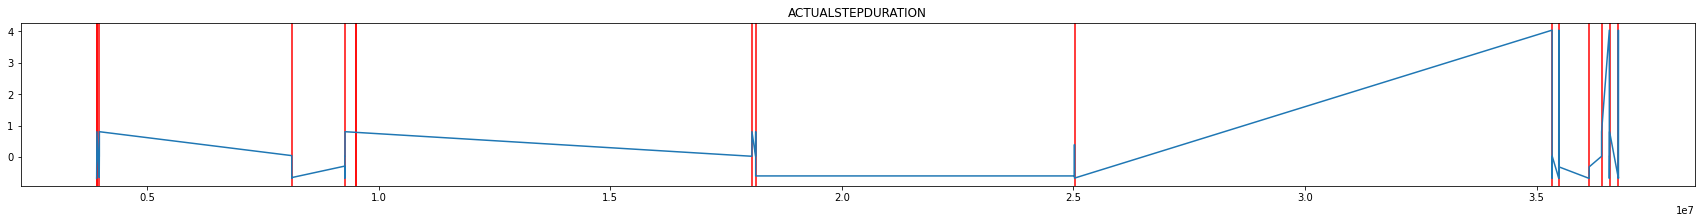

In [ ]:
#Flowcool leak graph and failures
for column in df_f3.columns[7:24]:
  plt.figure(figsize = (30, 3))
  for i in df_fault.index:
    if df_fault['fault_name'][i] == 'Flowcool leak':
      plt.axvline(x = df_fault['time'][i], color = 'red')
  plt.plot(df_f3['time'], df_f3[column])
  plt.title(column)

  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


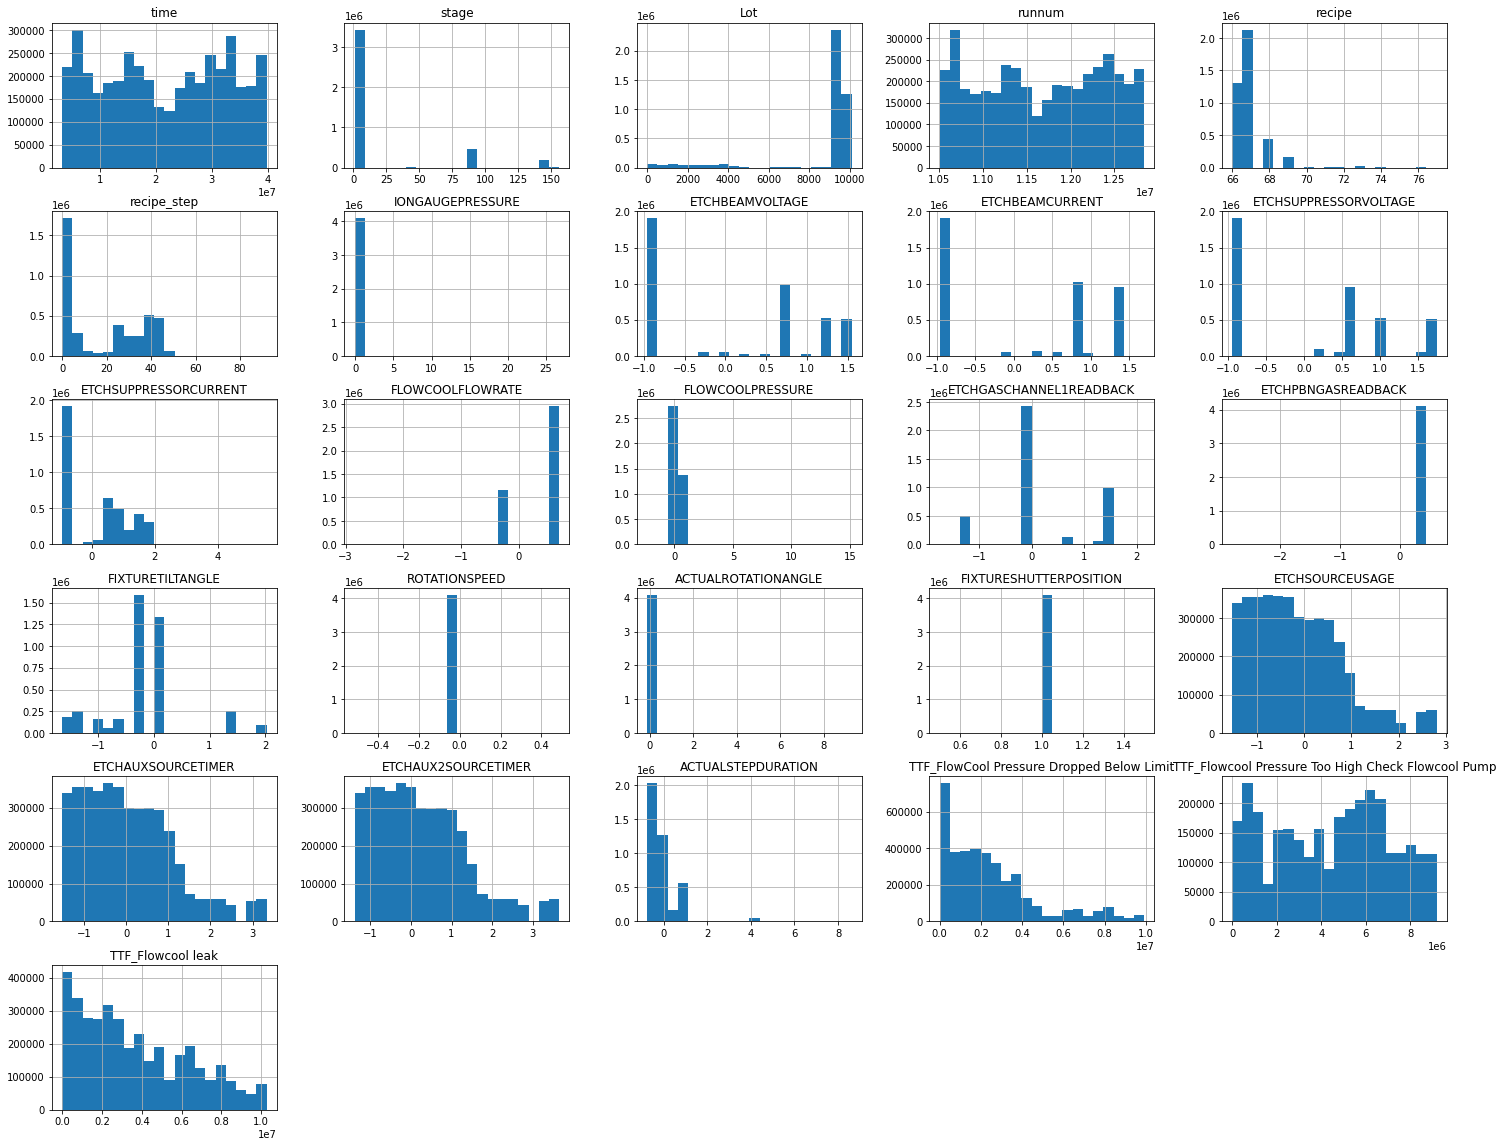

In [ ]:
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
hist = df.hist(bins=20, ax = ax)

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T
#'IONGAUGEPRESSURE', 'ETCHPBNGASREADBACK','ROTATIONSPEED', 'ACTUALROTATIONANGLE'

,count,mean,std,min,25%,50%,75%,max
time,4101355.00000,21499478.18330,10932678.83697,3284030.00000,11891892.00000,21244498.00000,31659888.00000,39789840.00000
stage,4101355.00000,17.69107,39.48889,1.00000,1.00000,1.00000,1.00000,156.00000
Lot,4101355.00000,8593.72305,2361.84864,0.00000,9191.00000,9332.00000,9614.00000,10106.00000
runnum,4101355.00000,11678913.97632,700515.90731,10511673.00000,11059045.00000,11687481.00000,12327503.00000,12838177.00000
recipe,4101355.00000,66.96662,1.09389,66.00000,66.00000,67.00000,67.00000,77.00000
recipe_step,4101355.00000,19.29794,16.60470,0.00000,3.00000,11.00000,38.00000,92.00000
IONGAUGEPRESSURE,4101355.00000,0.00494,0.08806,-0.07961,-0.00034,0.00859,0.01854,26.73743
ETCHBEAMVOLTAGE,4101355.00000,0.07810,1.00850,-0.96014,-0.94937,0.47186,0.95040,1.54968
ETCHBEAMCURRENT,4101355.00000,0.08745,1.01273,-0.96391,-0.95908,0.54237,0.79084,1.69201
ETCHSUPPRESSORVOLTAGE,4101355.00000,0.07590,1.00882,-0.94872,-0.94748,0.49344,1.06910,1.74978


In [ ]:
df_f1.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
time,32342.00000,22561011.88863,11283372.77632,3902156.00000,18056939.00000,22827884.00000,35476425.00000,36796800.00000
stage,32342.00000,3.02653,14.47052,1.00000,1.00000,1.00000,1.00000,143.00000
Lot,32342.00000,9358.00606,720.21481,486.00000,9241.00000,9361.00000,9614.00000,9746.00000
runnum,32342.00000,11747400.90699,721448.77892,10548007.00000,11470110.00000,11791247.00000,12587789.00000,12645359.00000
recipe,32342.00000,66.90542,0.38112,66.00000,67.00000,67.00000,67.00000,69.00000
recipe_step,32342.00000,30.10046,17.71146,2.00000,23.00000,31.00000,39.00000,92.00000
IONGAUGEPRESSURE,32342.00000,0.01633,0.48396,-0.07961,-0.01112,0.01162,0.02657,25.70267
ETCHBEAMVOLTAGE,32342.00000,0.27083,0.91809,-0.95353,-0.94960,0.71039,0.71187,1.54883
ETCHBEAMCURRENT,32342.00000,0.37112,0.99159,-0.96029,-0.95887,0.77417,1.37368,1.38921
ETCHSUPPRESSORVOLTAGE,32342.00000,0.24246,0.90313,-0.94872,-0.94606,0.63717,0.63800,1.64709


In [ ]:
df_f2.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
time,3138.00000,24212626.12365,3185225.25229,22067944.00000,22072057.00000,23797188.00000,23800573.00000,31427306.00000
stage,3138.00000,5.10134,23.87157,1.00000,1.00000,1.00000,1.00000,144.00000
Lot,3138.00000,9341.34608,137.74503,9217.00000,9237.00000,9321.00000,9349.00000,9643.00000
runnum,3138.00000,11861242.84544,195212.08441,11744123.00000,11744123.00000,11817473.00000,11817473.00000,12310888.00000
recipe,3138.00000,66.85150,0.83683,66.00000,66.00000,67.00000,67.00000,71.00000
recipe_step,3138.00000,24.65966,16.26428,3.00000,3.00000,27.00000,39.00000,47.00000
IONGAUGEPRESSURE,3138.00000,0.02163,0.01236,-0.02583,0.01909,0.02077,0.03208,0.04328
ETCHBEAMVOLTAGE,3138.00000,0.16746,0.97538,-0.95193,-0.94545,0.71016,1.18802,1.54814
ETCHBEAMCURRENT,3138.00000,0.18749,0.99002,-0.96022,-0.95908,0.76963,0.99330,1.38659
ETCHSUPPRESSORVOLTAGE,3138.00000,0.16208,0.96798,-0.94872,-0.94872,0.63704,1.06946,1.64690


In [ ]:
df_f3.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
time,10068.00000,21836198.42670,13068489.98519,3910392.00000,9268759.00000,25020708.00000,35479179.00000,36765836.00000
stage,10068.00000,5.54529,19.36022,1.00000,1.00000,1.00000,1.00000,88.00000
Lot,10068.00000,9294.42829,846.91290,2491.00000,9206.00000,9361.00000,9610.00000,9746.00000
runnum,10068.00000,11697573.99662,837110.52335,10548007.00000,10888413.00000,11891186.00000,12588681.00000,12643526.00000
recipe,10068.00000,66.83532,0.49201,66.00000,67.00000,67.00000,67.00000,68.00000
recipe_step,10068.00000,25.29013,15.84474,3.00000,3.00000,30.00000,39.00000,55.00000
IONGAUGEPRESSURE,10068.00000,-0.00339,0.02715,-0.05916,-0.02110,0.00055,0.01528,0.04191
ETCHBEAMVOLTAGE,10068.00000,0.19688,0.98082,-0.95961,-0.95045,0.71010,1.18773,1.54928
ETCHBEAMCURRENT,10068.00000,0.21536,0.99320,-0.96391,-0.95908,0.76999,1.36667,1.38673
ETCHSUPPRESSORVOLTAGE,10068.00000,0.17796,0.96800,-0.94872,-0.94734,0.63694,1.06937,1.64704


In [ ]:
df_ttf[df_ttf.isnull().any(axis=1)]

#after the last occurance of a failure, that failure will always report null in TTF
#maybe replace nulls with -1 so we can define cutoffs easily?
#    replacement after %4
#DO NOT replace nulls with 0

#only keep the rows where a number has changed from the last row
#only keep when TTF is < 10000
#SMOTE
#classify TTF < 400 as failure, a close to failure classification rather than failure itself
#    just need to figure out the cutoff

#2 step process
#1. RF or multi-class LR to make health index, then graph prob of failure with RUL cutoff at 0.5
#2. Determine RUL after possible failure soon detected

#plot the columns 7 and after with horizontal lines at the failure times
#plot the TTF
#find the results of the github code we found https://github.com/ninja1mmm/2018-phm-data-challenge

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
3761710,31427354,476.0,NaN,3912088.0
3761711,31427358,472.0,NaN,3912084.0
3761712,31427362,468.0,NaN,3912080.0
3761713,31427366,464.0,NaN,3912076.0
3761714,31427370,460.0,NaN,3912072.0
...,...,...,...,...
5110537,39789824,NaN,NaN,NaN
5110538,39789828,NaN,NaN,NaN
5110539,39789832,NaN,NaN,NaN
5110540,39789836,NaN,NaN,NaN


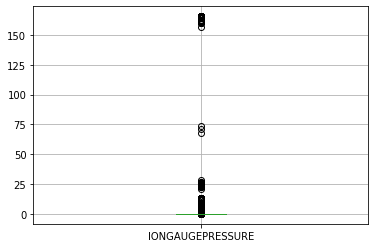

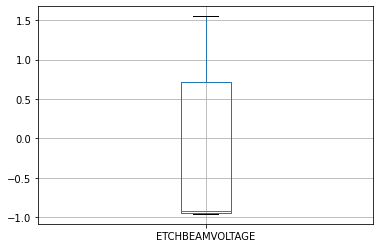

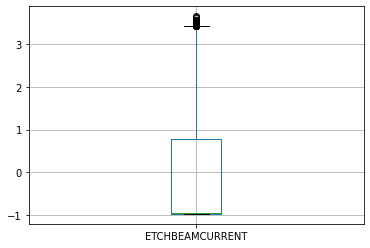

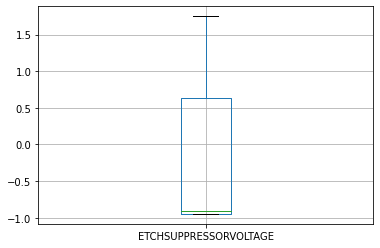

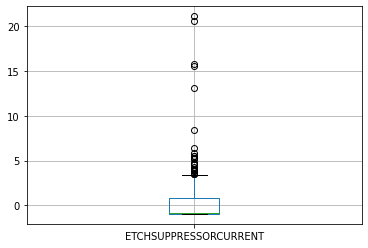

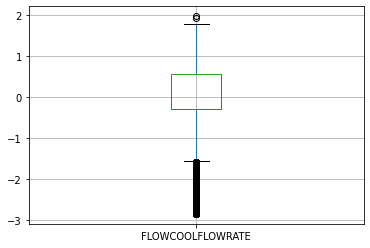

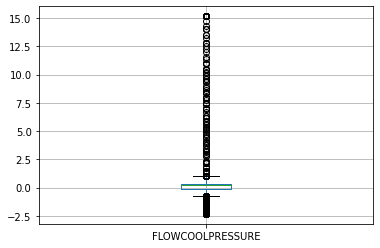

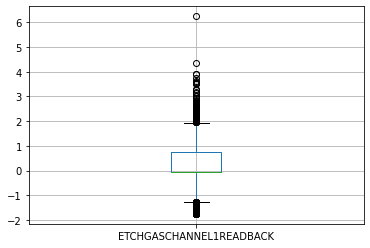

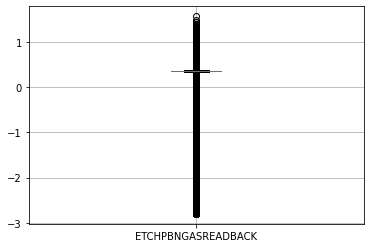

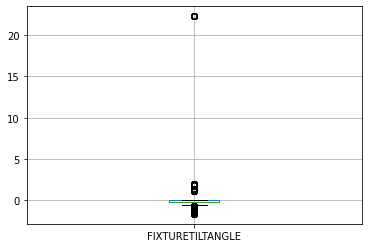

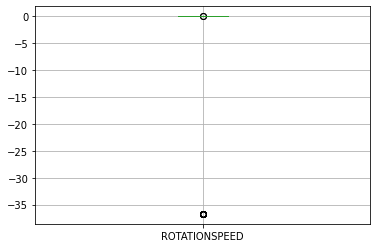

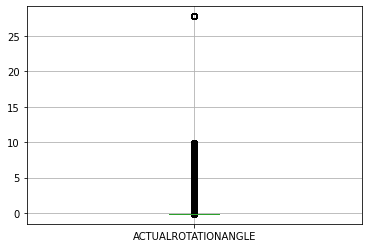

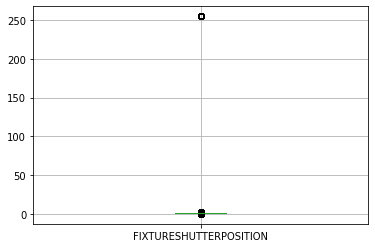

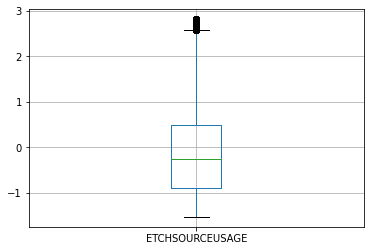

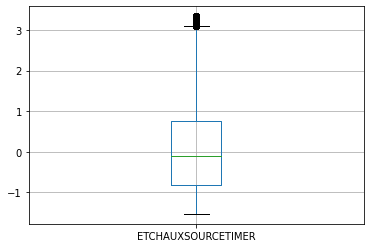

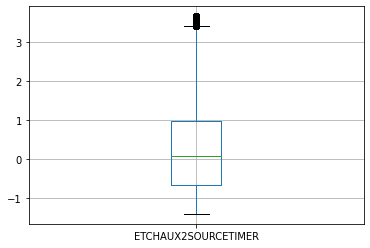

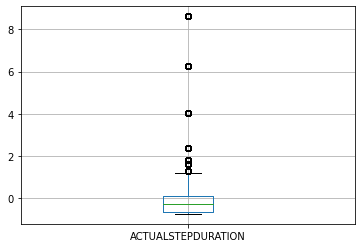

In [ ]:
for column in df_train.columns[7:]:
    plt.figure()
    df_train.boxplot([column])

In [ ]:
#MISSING DATA ANALYSIS
df_test = pd.DataFrame(columns=['Col1'])
df_test['Col1'] = df_train['time'].diff()
df_test.loc[df_test['Col1'] != 4]

df_test = df_test.sort_values(by='Col1', ascending=False)

df_test.head()

# print(39789840 - 3283834)
# print(36506006 - 5110542)

# for i in df_fault.index:
#     if df_fault['fault_name'][i] == 'Flowcool Pressure Too High Check Flowcool Pump':
#       print(df_fault['time'][i])

# for i in df_fault.index:
#     if df_fault['fault_name'][i] == 'Flowcool Pressure Too High Check Flowcool Pump':
#       display(df_f2.loc[df_f2['time'] == df_fault['time'][i]])

,Col1
2556004,511624.0
4545676,303058.0
1351557,299494.0
900961,284636.0
825783,282008.0


# IDEAS

*   Once we have the analysis complete, we can simulate data streaming from the CSV 
(take the last chunk of data that ends in a failure) and have it trigger the RF prediction, then output the predicted RUL on screen so it more closely resembles a real life implementation of a manufacturing plant. 5% of the grade is offloading the models into a WebAPI then making a web interface and this could be a perfect way to take care of that?
*   Instead of defining a strict cutoff for failures, we can do a range where we loop through the dataset and set a random point between x and y so the RUL analysis won't always start at the same number (only do this with a test where cutoff is static 500 first)




RANDOM FOREST RESULTS: 

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       991
         1.0       0.52      1.00      0.68        63

    accuracy                           0.94      1054
   macro avg       0.76      0.97      0.83      1054
weighted avg       0.97      0.94      0.95      1054

3000472    480.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5589196206101479
--------------------------------------------------------
3000473    476.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.6079376522371216
--------------------------------------------------------
3000474    472.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5741348181685622
--------------------------------------------------------
3000475    468.0
Name: TTF_FlowCool Pressure Dropped Below Limit, dtype: float64
0.5745376096157991
--------------------------------------------------------
3000476    464.0
Nam

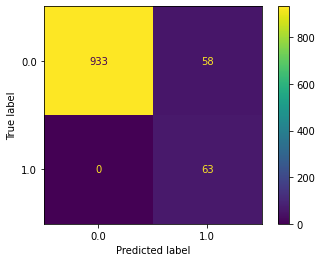

In [ ]:
#prod
#imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.preprocessing import StandardScaler

#get data with 20000 points from 0 as relevant and 625 point from 0 being fail data
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 5000, 250)

#drop categorical columns
df_temp = df1[['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure']]
df1 = df1.drop(['stage', 'recipe', 'recipe_step', 'TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)

#implement a standard scaler to normalize the dataset, but not scaling the target values.
scaler = StandardScaler()
scaler.fit(df1)
df1_scaled = scaler.transform(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns)
#reintroduce the target values
df_index = pd.DataFrame(df_temp.index.values)
df1_scaled = pd.concat([df1_scaled, df_index], axis=1, join = 'inner')
df1_scaled = df1_scaled.set_index(0)
df1_scaled = pd.concat([df1_scaled, df_temp ], axis=1, join = 'inner')

#get indices of 0 from df1
zero_index = df1_scaled.index[df1_scaled['TTF_FlowCool Pressure Dropped Below Limit'] == 0].tolist()
#get data from the second to last 0, until the last 0. This will be the test data
df_stream = df1_scaled.loc[zero_index[-3] : zero_index[-2]]

#train data is all data until the second to last 0
df_stream_train = df1_scaled.loc[:zero_index[-3]]

df_stream_xTrain = df_stream_train.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
df_stream_yTrain = df_stream_train['IsFailure']
#Use SMOTE to oversample the minority class
oversample = SMOTE()
df_stream_xTrain_smote, df_stream_yTrain_smote = oversample.fit_resample(df_stream_xTrain, df_stream_yTrain)

#test data is from the last uninterupted count to 0 in the dataset
df_stream_test = df_stream.loc[df_stream[df_stream['TTF_FlowCool Pressure Dropped Below Limit'] > df_stream['TTF_FlowCool Pressure Dropped Below Limit'].shift().rolling(2, min_periods=1).min()].tail(1).index.item():]

df_stream_xTest = df_stream_test.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
df_stream_yTest = df_stream_test['IsFailure']

#first, classify and see results
RFC2 = RandomForestClassifier(n_estimators=100, n_jobs = -1, criterion = 'entropy', max_depth = 5, random_state = 25)
#RFC.fit(df_stream_xTrain, df_stream_yTrain)
RFC2.fit(df_stream_xTrain_smote, df_stream_yTrain_smote)


print("RANDOM FOREST RESULTS: \n")        
y_pred_stream = RFC2.predict(df_stream_xTest)
#print(confusion_matrix(df_stream_yTest, y_pred_stream))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(df_stream_yTest, y_pred_stream),
                               display_labels=RFC2.classes_)
disp.plot()
print(classification_report(df_stream_yTest, y_pred_stream))

for i in range(len(df_stream_xTest)):
    predictions = RFC2.predict_proba(df_stream_xTest.iloc[[i]])
    if predictions[0][1] > 0.55:
        print(df_stream_test['TTF_FlowCool Pressure Dropped Below Limit'].iloc[[i]])
        print(predictions[0][1])
        print('--------------------------------------------------------')

#OHE, do SMOTE ran split, second to last 0 split, compare those classifiactions, then regress, then predict (maybe with regressor)